#                                Investing in a Sushi Restaurant in London  


#### by Sukriti Shukla


### Introduction : Business Problem

Tai Chi is a Japanese investor settled in the city of London. He plans to invest in an existing & upcoming Sushi restaurant in London neighborhood therefore, searching for potential options in this regard. The target audience for our analysis here would primarily be Tai Chi alongwith many potential operators or investors in restaurant business, food bloggers & analysts, suppliers & connoisseur of Asian cuisine in particular.

This project tries to assess factors that determine the investment in a restaurant business. We try to help Tai Chi analyze the demography, economy & consumption patterns of Londoners with the help of Data Science in Python. In addtion we study consumers, visitors & neighborhoods in London to select the most suitable investment option for Tai Chi.

### Data

For the analysis of Tai Chi’s problem, I have tried to understand his situation from a broad perspective as well as a granular perspective. The data analysis therefore, revolves around both macroeconomic data like London's economy or UK household's consumption patterns & micro-level data pertaining to the Sushi restaurants in London neighborhoods, their ratings and reviews.

Below are the primary sources of data (both macro & micro-level) used in this regard:-
- **Demographic Indicators** like Population & Ethnicity in London, Population growth in London, Ethnicity in London vs Rest of United Kingdom, Ethnicity in London Boroughs - Data from webpages of Office for National Statistics (ONS), Annual Population Survey and the UN World Urbanization Prospects report were used. Some Wikipedia pages also helped produce borough-wise ethnicity data for analysis.


- **Economic, Consumption & Expenditure Indicators** like Number of International Visitors to London, Year-on-year annual household expenditure growth in UK, UK's Household expenditure by region vs. UK average expenditure per week, Nationwide House Price Index for London and the UK, How businesses rate London as a place to do business in 2014, Factors affecting businesses in London in 2014 - Primary data sources were International Passenger Survey (IPS), Office for National Statistics & 2014 London Business Survey (LBS).


- **London Neighborhoods’ Data Compilation** - Data related to areas in London along with their neighboring boroughs was found
from the below 2 sources on Wikipedia page. London is administered by the City of London and 32 London boroughs. Details regarding List of areas of London, List of London boroughs was scraped from Wikipedia pages. The cleaned London neighborhoods’ location & corresponding latitude, longitude data was compiled to create a map of London using Folium library.


- **Explore & Cluster Sushi Restaurants in London Neighborhoods** - Foursquare API location data was used to execute search for Sushi restaurants in London neighborhoods around the center of London city. I have explored & clustered all venues, their ratings, tips & reviews to help Tai Chi find the most suitable Sushi restaurant in London neighborhood for his investment.

### Data Analysis - 

#### Macro Level Data Analysis -
Let's first start by analysing Macro-level data like the Demographic, Economic, Consumption & Expenditure Indicators in London/United Kingdom

**1. Population Growth in London** - (Source: Office for National Statistics (ONS) Annual Population Survey; UN World Urbanization Prospects) 

London has grown annually by almost 1.45% since 2015. These population estimates and projections come from the latest revision of the UN World Urbanization Prospects. These estimates represent the Urban agglomeration of London, which typically includes London's population in addition to adjacent suburban areas.

Firstly, we analyse here the Growth in Numbers as well as Growth Rate of Population in London from 2000s onwards till now & projecting it further uptill 2035.

In [2]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [19]:
# Download excel from the data source link below to get the data
# Source link: http://worldpopulationreview.com/world-cities/london-population/

London_Growth=pd.read_excel('London Population Growth.xlsx',sheet_name='data (3)')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [20]:
# Step 1 - Pre-process the data
London_Growth=London_Growth.head(9)
London_Growth.sort_values(['Year'],ascending=True,axis=0,inplace=True)
London_Growth

,Year,Population,GrowthRate,Growth
8,2000,7272819,0.006829,243311
7,2005,7501217,0.006203,228398
6,2010,8044433,0.014081,543216
5,2015,8661381,0.014889,616948
4,2019,9176530,0.014549,515149
3,2020,9304016,0.013893,127486
2,2025,9840742,0.011280,536726
1,2030,10228051,0.007750,387309
0,2035,10556486,0.006341,328435


The graph below shows trends in growth rate. This is primarily due to increasing prosperity combined with increased immigration. Just 20 years later, the population had increased to 7,172,036 at the time of the 2001 census, and further increases are expected to push the population past 9 million by 2021. However, around 2025 we can see a slump in the growth rate.

Text(0, 0.5, 'Population % Growth Rate')

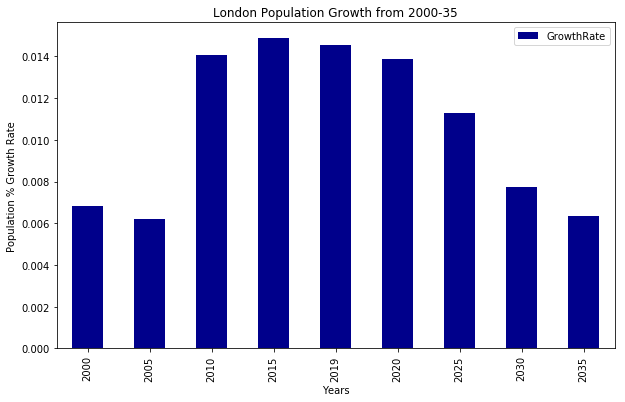

In [21]:
#Step 2 - Plot the bar graph showing Percentage growth in London's population
London_Growth.plot(kind='bar',x='Year',y='GrowthRate', figsize=(10,6),color='darkblue')

plt.title('London Population Growth from 2000-35')
plt.xlabel('Years')
plt.ylabel('Population % Growth Rate')

**2. Population & Ethnicity in London** - 
Next, the Borough-wise share of London population is shown as per Ethnic Group Statistics by 2011 Census groupings for the period 2012-17. Mixed & Other are combined due to small sample sizes. 

Data in excel from the source link is downloaded & formatted to get the desired data subset for visualization & analysis. We have restricted our analysis to only 2017 due to relevance & ease of visualization.

In [13]:
# Download excel from the data source link below to get the data
# Source link: https://data.london.gov.uk/dataset/ethnic-groups-borough
London_ethnic = pd.read_excel('ethnic-groups-by-borough.xlsx',sheet_name='2017',skiprows=range(2))
                       
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [14]:
# Clean up & pre-process data -
London_ethnic.drop(['Unnamed: 7'], axis=1, inplace=True)
London_ethnic.rename(columns={'Unnamed: 0':'Code', 'Unnamed: 1':'Area','Unnamed: 2':'White','Unnamed: 3':'Asian',
                             'Unnamed: 4':'Black','Unnamed: 5':'Mixed/ Other','Unnamed: 6':'Total',
                             '95% Confidence Interval':'95% Confidence Interval White',
                             'Unnamed: 9':'95% Confidence Interval Asian','Unnamed: 10':'95% Confidence Interval Black',
                             'Unnamed: 11':'95% Confidence Interval Mixed/Other',
                             'Unnamed: 12':'95% Confidence Interval Total'},inplace=True)


From the entire dataset we filter Ethnic data pertaining to only 9 regions of United Kingdom including London. We will analyze only the Numbers column for different Areas in UK.

In [15]:
# Step 1 - Filter relevant data set pertaining to 9 regions in UK for further data visualization. 
UnitedKingdom_regions=London_ethnic[34:43]
UnitedKingdom_regions.set_index('Area',inplace=True)

The Pie Chart below shows the Total distribution of Population in major regions of United Kingdom vs. London for the year 2017. 

London's population makes it by far the largest city in the United Kingdom, ahead of Birmingham, the second largest city in the UK. We can also see from the chart below that London's population is the second highest (approx. 16.6%) in UK after South East (16.7%).

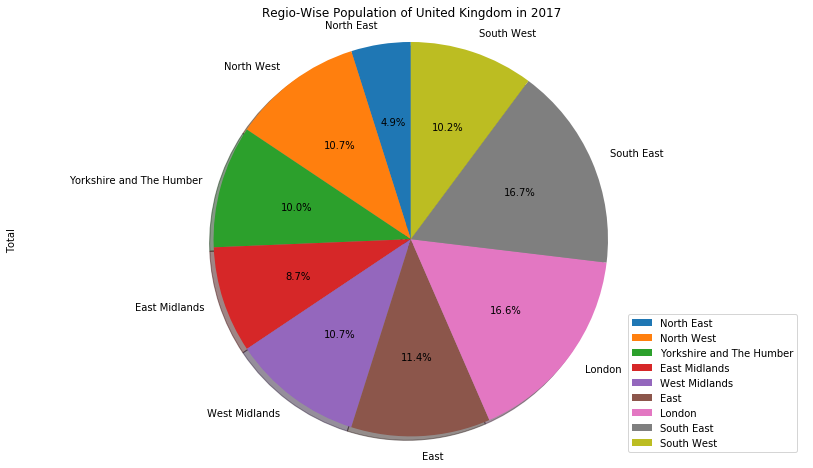

In [16]:
#Step 2: Plot the data in a Pie Chart form along with the additional parameters:
UnitedKingdom_regions['Total'].plot(kind='pie',
                           figsize=(14,8),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True)

plt.title('Regio-Wise Population of United Kingdom in 2017')
plt.axis('equal')
plt.legend(labels=UnitedKingdom_regions.index,loc='lower right')
plt.show()

We now plot the Ethnic distribution of population in 2017 only for London. The bar graph below shows that although White form the biggest section of London's population. There has been a rise in Asian population with a rising migrant population much like Tai Chi's ancestors.

In [17]:
# Step 1 - Filter London's Ethnic Population data for 2017
London_data=London_ethnic.iloc[40]
London_data=pd.DataFrame(London_data)
London_data.drop(['Total','Area','Code','Unnamed: 8','95% Confidence Interval Asian','95% Confidence Interval Black',
                  '95% Confidence Interval Mixed/Other','95% Confidence Interval Total'],axis=0,inplace=True)

London_data.rename(columns={40:'London Population'},inplace=True)

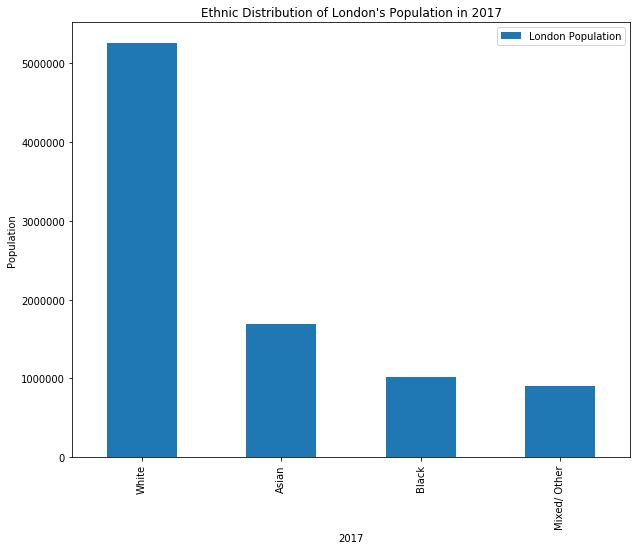

In [18]:
# Step 2 - Display the bar chart for the data filtered
London_data.plot(kind='bar',figsize=(10,8))
plt.title("Ethnic Distribution of London's Population in 2017")
plt.xlabel('2017')
plt.ylabel("Population")

plt.show()

**3. Ethnicity in London vs Rest of United Kingdom** - (Source: UN World Urbanization Prospects)
<br>These population estimates and projections come from the latest revision of the UN World Urbanization Prospects. Here, we have studied the ethnic mix of population in London vs. other regions in the United Kingdom as per the 2011 Census.

In [3]:
# Download excel from the data source link below to get the data
# Source link: http://worldpopulationreview.com/world-cities/london-population/
UK_Ethnicity=pd.read_excel('Ethnicity in London vs UK.xlsx')
                       
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
# Clean up & pre-process data -
UK_Ethnicity.set_index('Place',inplace=True)
UK_Ethnicity

,White,Asian,Black,Mixed,Other
Place,,,,,
East Midlands,89.3,6.5,1.8,1.9,0.6
East of England,90.8,4.8,2.0,1.9,0.5
England and Wales,86.0,7.5,3.3,2.2,1.0
London,59.8,18.5,13.3,5.0,3.4
North East,95.3,2.9,0.5,0.9,0.4
North West,90.2,6.2,1.4,1.6,0.6
South East,90.7,5.2,1.6,1.9,0.6
South West,95.4,2.0,0.9,1.4,0.3
Wales,95.6,2.3,0.6,1.0,0.5


London as a city is considerably more diverse than the rest of the United Kingdom. Across England and Wales, 86% of the population is White based on the 2011 Census, but in London that number falls to 69.7%. The White proportion of London's population increases when traveling away from the city center.

The graph on ethnicity below, compiled using 2011 census data from the ONS provides details of the ethnicity of London residents compared to residents of England and Wales. Another observation is that although there is a decrease in % of White population in London compared to the rest of England, the Asian population seems to be much higher in London (almost more than double) than in other parts.

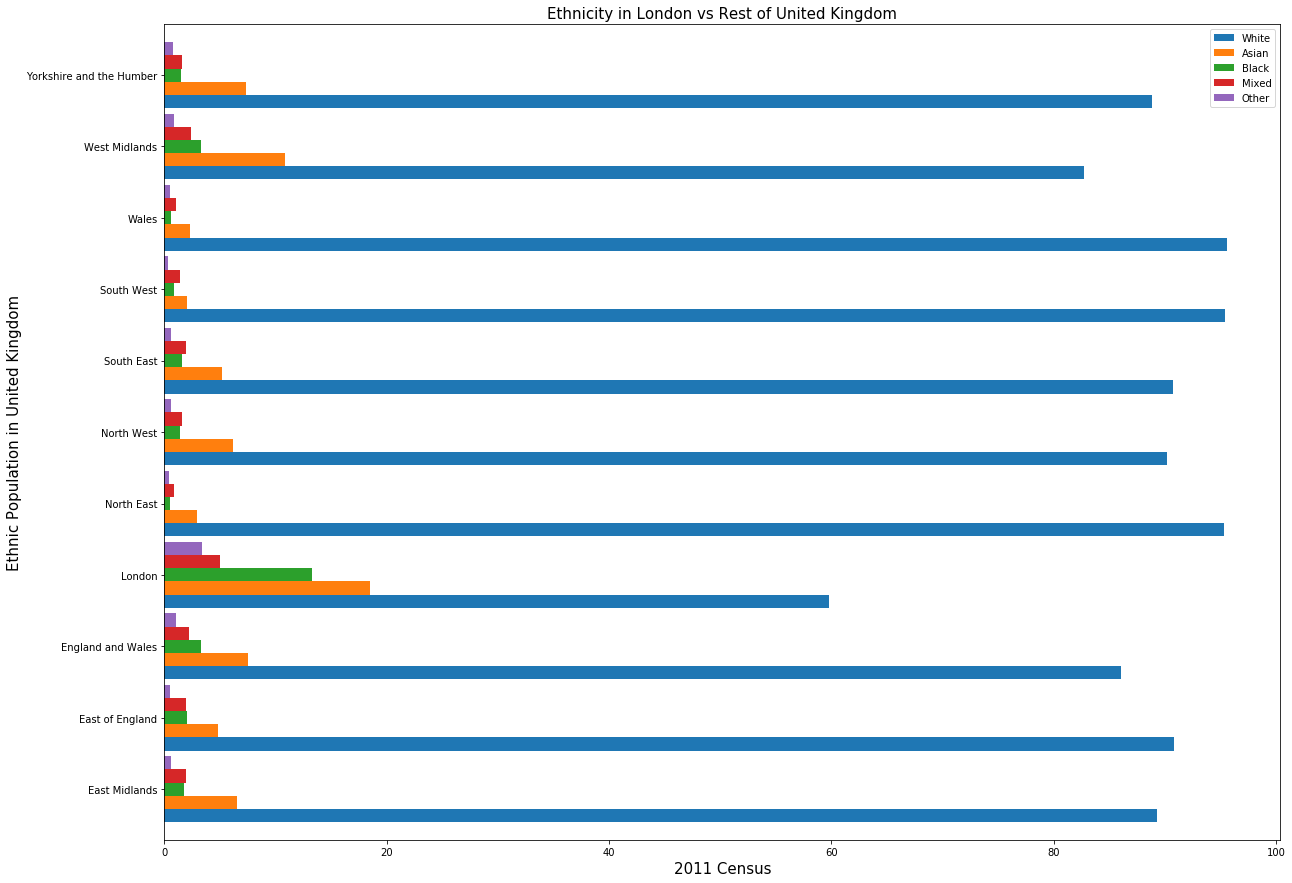

In [8]:
# Plot the Horiontal Bar Graph for the data -
UK_Ethnicity.plot(kind='barh',figsize=(20,15),width=0.92)
plt.title('Ethnicity in London vs Rest of United Kingdom',fontsize=15)
plt.xlabel('2011 Census',fontsize=15)
plt.ylabel('Ethnic Population in United Kingdom',fontsize=15)
plt.legend(fontsize=10)

plt.show()

**4. Ethnicity in London Boroughs** - (Source: Wikipedia page about Demography of London)
<br>Now, we move to analyzing the Borough-wise Ethnicity in London. So, we have scraped the data in the table Race by borough section of this page to show the proportion of races by London borough (as found in 2011 census).

In [9]:
# Step 1 - Gather Data - Scrape wikipedia page to extract HTML text script
# Source Link - https://en.wikipedia.org/wiki/Demography_of_London
import requests
from lxml.html import fromstring
wikipedia_url = requests.get('https://en.wikipedia.org/wiki/Demography_of_London').text

from bs4 import BeautifulSoup
soup=BeautifulSoup(wikipedia_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Demography of London - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Demography_of_London","wgTitle":"Demography of London","wgCurRevisionId":899043513,"wgRevisionId":899043513,"wgArticleId":4972737,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: Archived copy as title","EngvarB from June 2017","Use dmy dates from June 2017","Geography of London","Demographics of England","Demographics by city","History of London"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNam

In [10]:
# Find class ‘wikitable sortable’ in the HTML script
My_table=soup.find('table',{'class':'wikitable sortable'})

# Get all the tables
tables = soup.find_all('table',class_="wikitable")

# extract the content
contents = [item.get_text() for item in tables[3].find_all('td')]

In [11]:
# Clean the data table, convert to dataframe with column headers & formatting the data
# This table shows the proportion of races by London borough, as found in the 2011 census.
data_head=['Local Authority', 'White','Mixed','Asian','Black','Other']
data = list(zip(*[iter(contents)]*6))
London_demographics = pd.DataFrame(data[0:], columns=data_head)
London_demographics['Other'] = London_demographics['Other'].str.rstrip('\n')

London_demographics['White'] = London_demographics['White'].astype(float)
London_demographics['Mixed'] = London_demographics['Mixed'].astype(float)
London_demographics['Asian'] = London_demographics['Asian'].astype(float)
London_demographics['Black'] = London_demographics['Black'].astype(float)
London_demographics['Other'] = London_demographics['Other'].astype(float)

London_demographics.head(5)

,Local Authority,White,Mixed,Asian,Black,Other
0,Barnet,64.1,4.8,18.5,7.7,4.9
1,Barking and Dagenham,58.3,4.2,15.9,20.0,1.6
2,Bexley,81.9,2.3,6.6,8.5,0.8
3,Brent,36.3,5.1,34.1,18.8,5.8
4,Bromley,84.3,3.5,5.2,6.0,0.9


As we can see from the plot below, as the data set is huge the graph shows each borough as a number as in the datarame instead of its name. 

Like in rest of the England, Whites form the largest part of London's population in almost all the boroughs. Asians are the second largest part, except for some boroughs like Harrow & Redbridge where they equal the Whites. Newham is the only borough where Asians outnumber White population. 

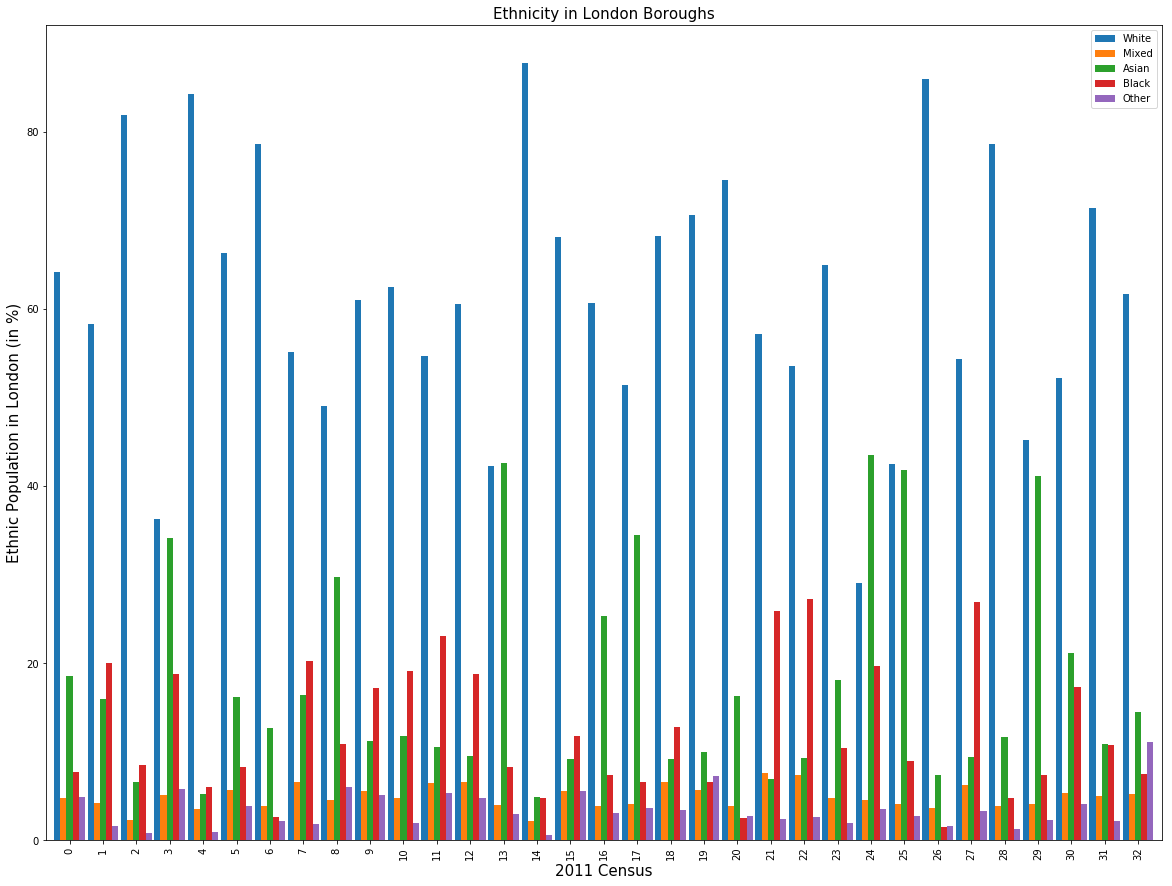

In [22]:
# Step 2 - Plot the Borough-wise Ethnic Distribution of Population as per 2011 Census into Multiple Bars chart
London_demographics.plot(kind='bar',figsize=(20,15),width=0.92)
plt.title('Ethnicity in London Boroughs',fontsize=15)
plt.xlabel('2011 Census',fontsize=15)
plt.ylabel('Ethnic Population in London (in %)',fontsize=15)
plt.legend(fontsize=10)

plt.show()

**5. Number of International Visitors to London** - (Source: International Passenger Survey (IPS) as per Office for National Statistics)
<br> Visitors from overseas broken down by duration, quarter and country of origin 2002 to 2017 (Quarterly data to Q3 2018). Table includes data on visits, nights and spending. 

For the analysis here we have only taken data for Visits (in 000s) by Country. Inorder to evaluate Japanese tourists visiting London this analysis restricts visitors from Japan only. The period considered is also recent i.e. from 2012-18.

In [23]:
# Download excel from the data source link below to get the data
# Source Link - https://data.london.gov.uk/dataset/number-international-visitors-london 
London_visitors = pd.read_excel('international_visitors.xlsx',sheet_name='By country')
                       #skiprows=range(20),
                       #skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [24]:
# Clean & pre-process data - This calls the first row for the header
new_header = London_visitors.iloc[0] 
# take the rest of your data minus the header row
London_visitors = London_visitors[1:] 
# set the header row as the df header
London_visitors.columns = new_header 

London_visitors.head()

,Country of origin,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,...,2011,2012,2013,2014,2015,2016,2017,2018 Q1,2018 Q2,2018 Q3
1,Argentina,14.595359,21.530759,23.171489,20.924880,28.379647,30.490790,20.118809,55.374189,52.414781,...,70,89,104,108,108,116,108,25,22,20
2,Australia,436.891727,450.713647,477.734498,552.648102,578.843809,595.252244,583.716974,571.190791,624.276479,...,1187,1100,1210,1015,949,800,861,118,170,205
3,Austria,109.513295,128.980635,128.658541,122.257793,140.786416,163.691162,141.659064,168.772011,165.925535,...,219,190,217,190,195,208,155,32,39,29
4,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,37,40,38,19,27,35,7,9,10
5,Belgium,288.613801,306.210368,359.225735,300.533481,342.794215,351.088228,307.737222,349.916624,488.811481,...,347,384,448,376,415,350,400,84,65,59


In [25]:
# Filter the data for Japan-related data for the period 2012-18 only - 
Japan_data=London_visitors.iloc[25]
Japan_data=Japan_data.iloc[11:20]

# Create the Index 
Years = ['2012', '2013', '2014', '2015', '2016', '2017','2018 Q1','2018 Q2','2018 Q3'] 
  
# Set the index 
Japan_data.index = Years
Japan_data.name='Visits in 000s'
Japan_visitors=pd.DataFrame(Japan_data)
Japan_visitors

,Visits in 000s
2012,177.854
2013,155.349
2014,157.478
2015,151.399
2016,180.328
2017,174.774
2018 Q1,59.7568
2018 Q2,35.5931
2018 Q3,57.3626


As per the horizontal bar plot shown below, the number of Japanese visitors increased substantially in the year 2012 & during 2016-17. But thereafter there has been a decline during the first 3 quarters of 2018.

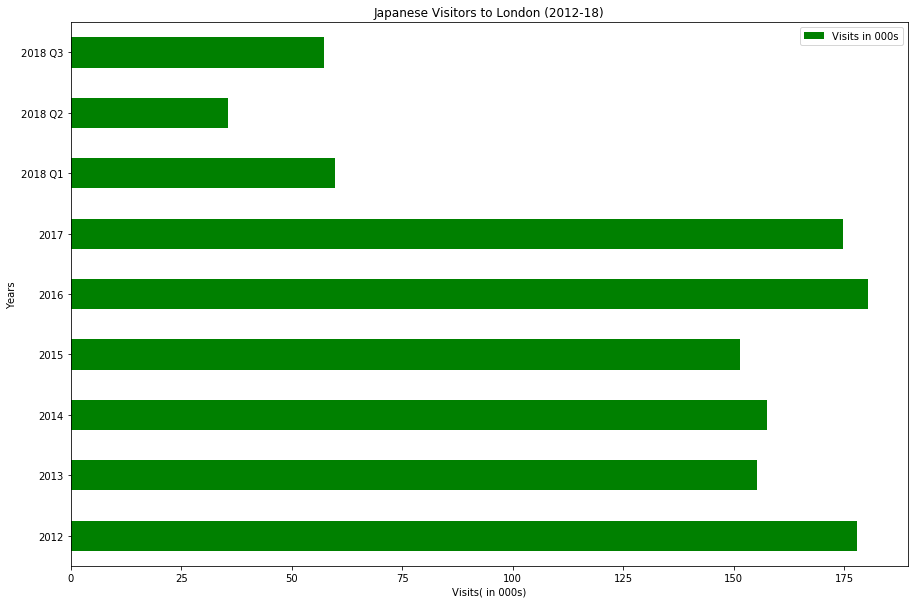

In [26]:
# Step 2 - Plot the horizontal bar plot or the Japanese Visitors to London from 2012-18:-

Japan_visitors.plot(kind='barh', figsize=(15,10),color='green')

plt.title('Japanese Visitors to London (2012-18)')
plt.xlabel('Visits( in 000s)')
plt.ylabel('Years')

plt.show()

**6. Year-on-year annual household expenditure growth in UK** - (Source: Office for National Statistics)
<br> In order to understand consumer trends in UK we analyze the Household final consumption expenditure (HHFCE), as a measure of economic growth. 
Here, UK’s only the data pertaining to chained volume measure for the period 2011-18 has been used to show year on year percentage growth in expenditure of households in the UK.

In [222]:
# Download excel from the data source link below to get the data
# Source Link - https://www.ons.gov.uk/economy/nationalaccounts/satelliteaccounts/bulletins/consumertrends/octobertodecember2018
UK_HH_Exp = pd.read_excel('YoY HH Cons Exp Growth.xlsx',
skiprows=range(3),skipfooter=4,header=0,names=['Year','2011','2012','2013','2014','2015','2016','2017','2018'])

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [223]:
# Step 1 - Gather,clean & pre-process the data -
UK_HH_Exp=UK_HH_Exp.transpose()
UK_HH_Exp.columns = UK_HH_Exp.iloc[0]
UK_HH_Exp = UK_HH_Exp[1:]

UK_HH_Exp

Year,Contribution to growth (%)
2011,-0.9
2012,1.7
2013,2
2014,2.1
2015,2.7
2016,3.2
2017,2.2
2018,1.8


The year on year percentage growth in expenditure of households in the UK shows an increasing trend below. However, the growth rate has declined in the last two years.

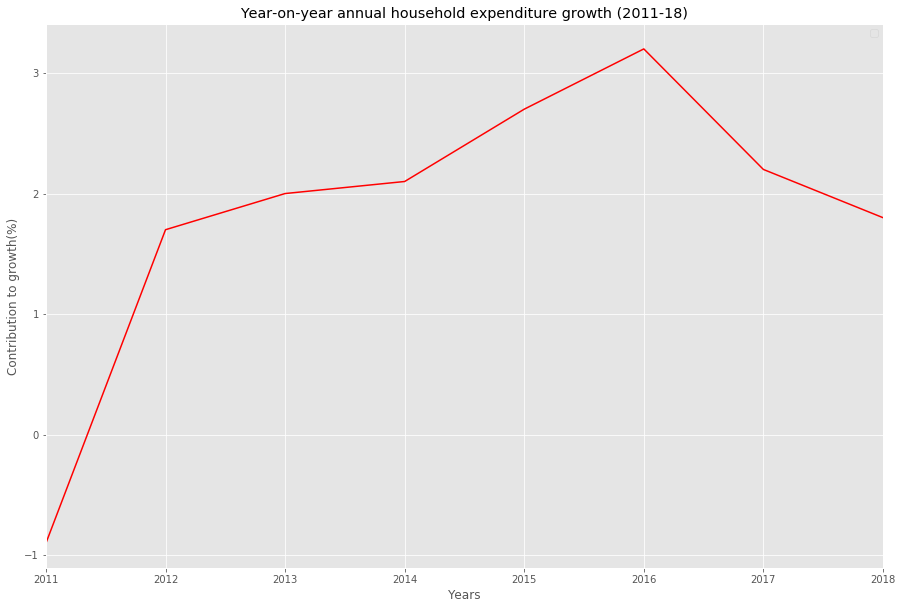

In [227]:
# Step 2 - Plot the line Graph for the data -
UK_HH_Exp.plot(kind='line', figsize=(15,10),color='red')

plt.title('Year-on-year annual household expenditure growth (2011-18)')
plt.xlabel('Years')
plt.ylabel('Contribution to growth(%)')

plt.legend('')

plt.show()

**7. UK's Household expenditure by region vs. UK average expenditure per week** - (Source: Office for National Statistics)
Here we have tried to compare the (£ per week) expenditure in each of the regions' (including London) with the UK average. The comparison is made FY ending 2015-17. Consumers expenditure & consumption patterns in London will help us understand the culture in London & priorities of Londoners as different from UK citizens in other regions.

In [27]:
# Download excel from the data source link below to get the data
# Source Link - https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/expenditure/bulletins/familyspendingintheuk/financialyearending2017
UK_HHE_Regional= pd.read_excel("UK's HH Regional Exp.xlsx",
skiprows=range(6),skipfooter=0,header=0)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [28]:
# Step 1 - Gather data & pre-process it -  
UK_HHE_Regional.rename(columns={'Household expenditure': 'Household expenditure (£ per week)'})
UK_HHE_Regional.set_index(['Region'],inplace=True)

UK_HHE_Regional

,Household expenditure,UK average (£)
Region,,
London,643.7,536.8
South East,632.2,536.8
East,558.1,536.8
South West,535.5,536.8
East Midlands,530.8,536.8
Northern Ireland,497.1,536.8
North West,492.4,536.8
Scotland,492.3,536.8
Yorkshire and The Humber,489.7,536.8


When comparing between English regions and UK constituent countries, average weekly household spending differed by more than £200. England had the highest level of household spending for FY ending 2015-17. Average weekly household spending for England was £547.40 a week, compared with the UK average of £536.80 for the same time period

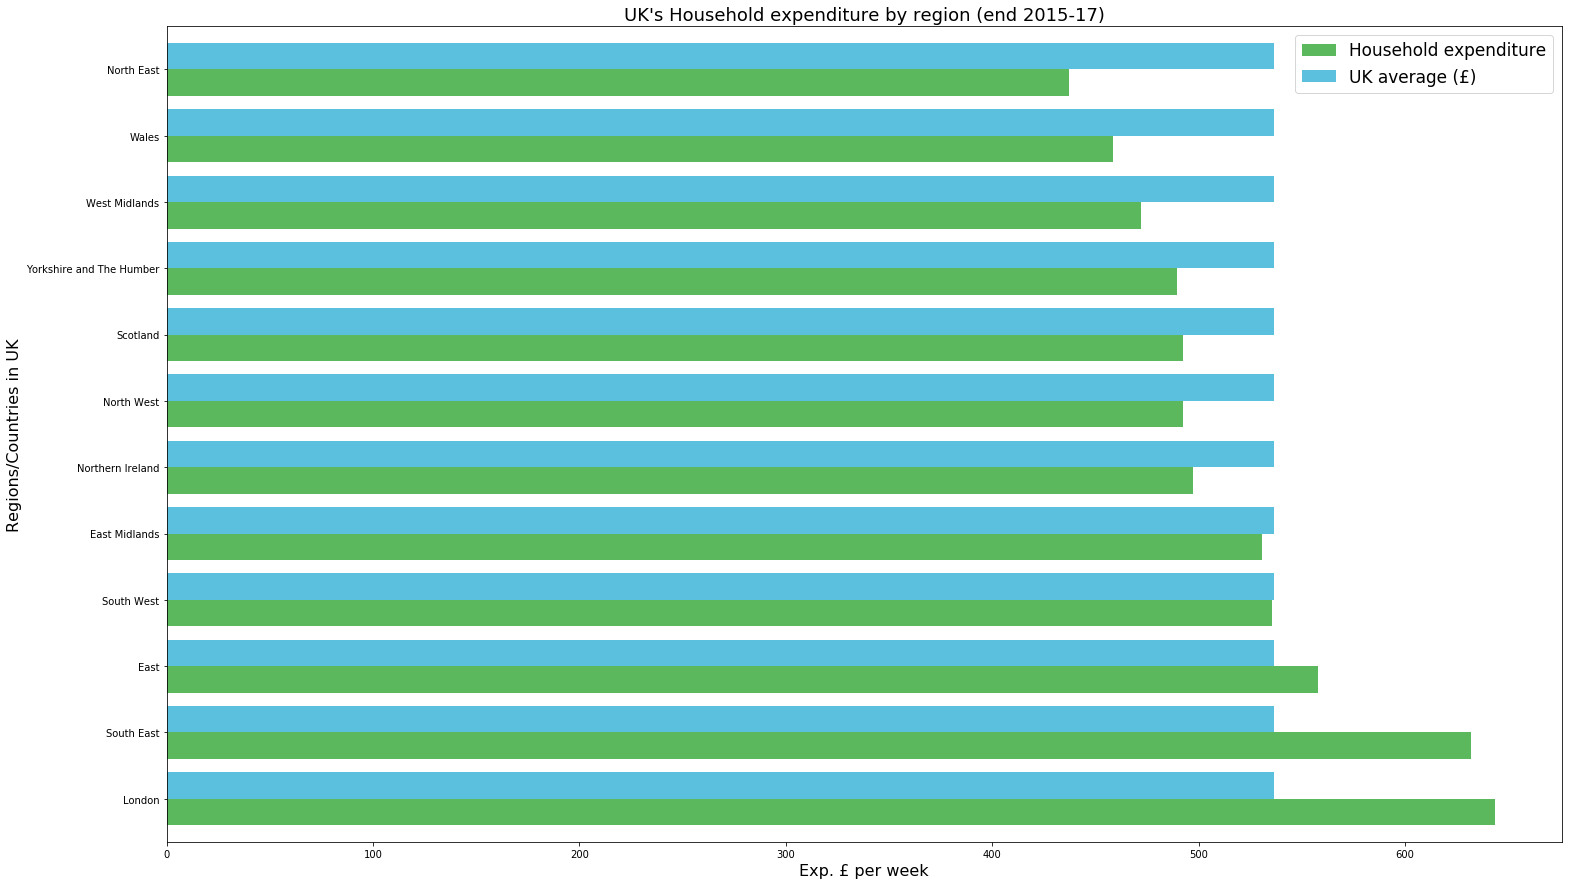

In [29]:
# Plot Horizontal Bar graph of UK's Household expenditure by region
from matplotlib.figure import Figure # import Figure artist 
fig=Figure()

ax=fig.add_subplot(111) # create an axes artist
ax=UK_HHE_Regional.plot(kind='barh',figsize=(25,15),width=0.8,color=['#5cb85c','#5bc0de'])
ax.set_title("UK's Household expenditure by region (end 2015-17)",fontsize=18)
ax.set_xlabel("Exp. £ per week",fontsize=16)
ax.set_ylabel("Regions/Countries in UK",fontsize=16)
ax.legend(fontsize=17,loc=0)

**8. Nationwide House Price Index for London and the UK** - (Source: Greater London Authority)
<br>Nationwide Regional House Price Index is one of several indicators for house prices published on a quarterly basis. In our analysis below we have considered housing indicator’s data for 2013-18 only for estimating the Annual % change in house prices in London vs. that in the UK.

In [30]:
# Download excel from the data source link below to get the data
# Source Link - https://data.london.gov.uk/dataset/london-economy-today
UK_Housing= pd.read_excel('House Price Index.xlsx',
skiprows=range(164),skipfooter=6,header=0,names=['Quarter','Average house price London (in £)','Average house price UK (in £)','Annual change London (%)',
                                              'Annual change UK (%)'])

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [31]:
# Step 1 - Gather & pre-process data
UK_Housing.drop(['Average house price London (in £)','Average house price UK (in £)'],axis=1, inplace=True)
UK_Housing.set_index(['Quarter'],inplace=True)
UK_Housing

,Annual change London (%),Annual change UK (%)
Quarter,,
2013 Q1,0.046140,0.001118
2013 Q2,0.051719,0.014294
2013 Q3,0.101126,0.043473
2013 Q4,0.149070,0.070658
2014 Q1,0.181056,0.091370
2014 Q2,0.258194,0.115852
2014 Q3,0.211887,0.104949
2014 Q4,0.177553,0.083334
2015 Q1,0.126052,0.057687


One of several indicators for consumption & expediture in London/UK are the house prices published on a quarterly basis by the authorities. A visualization of this data helps us to analyse the cost of living & Household spending patterns in London vs. other regions of UK. As we can see in the chart below, Annual % change in House prices in London has been very high compared to the same in UK. Also, it has shown an increasing trend every year til 2014 ending however, recently the trend has declined for London. 
 
Recent results show a negative % change in House Prices Index for London (from 2017 Q3 onwards), thereby showing housing to become cheaper & more affordable than rest of UK in recent times.

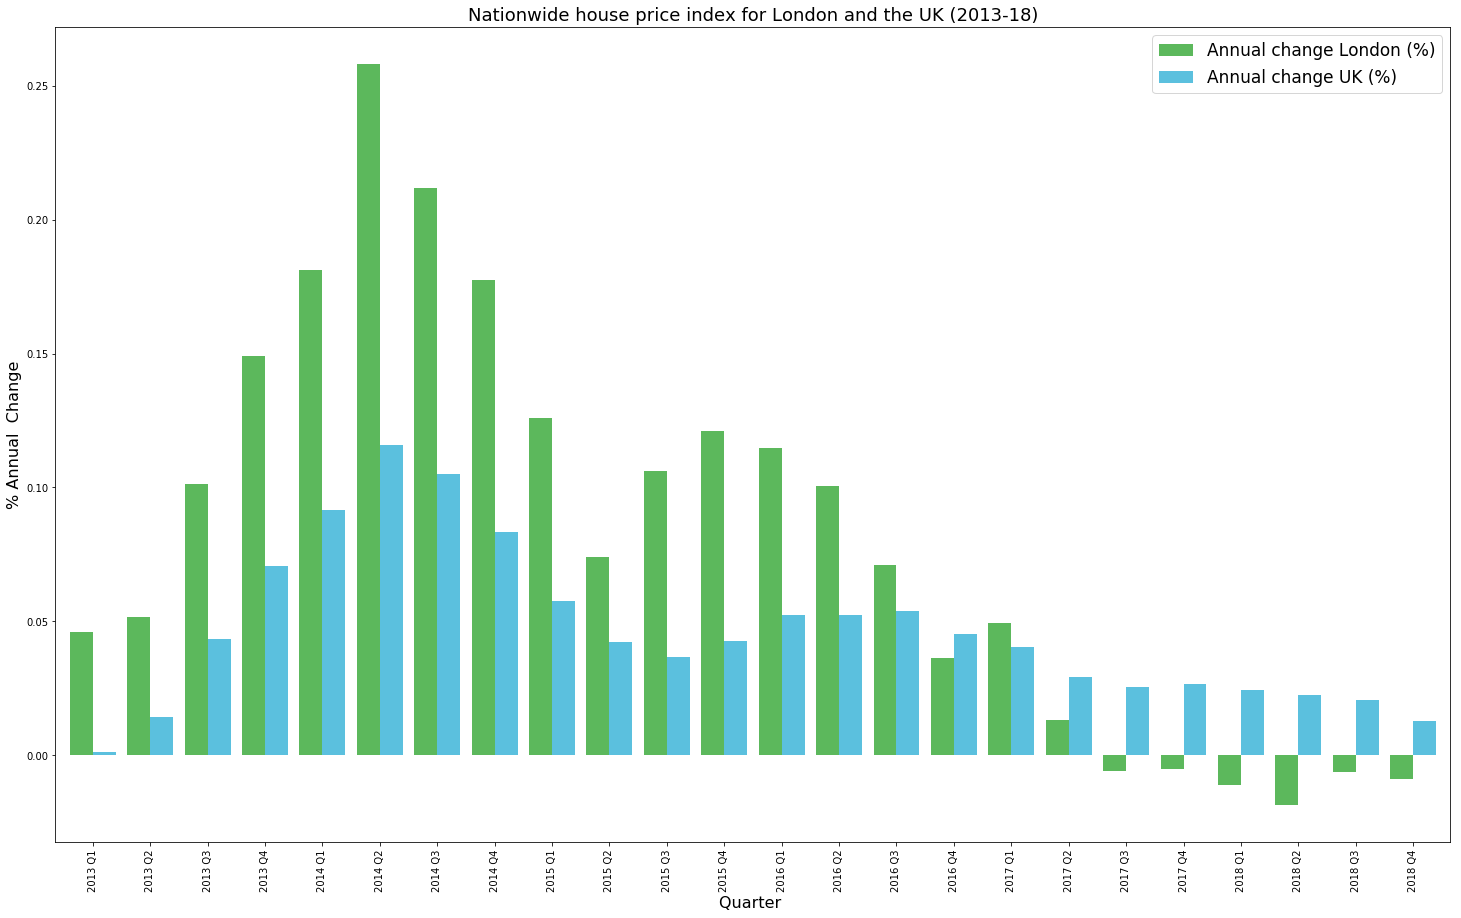

In [32]:
# Step 2 - Plot Bar graph for the data comparing the Annual Percent Change in House Prices for London vs. UK (2013-18)
from matplotlib.figure import Figure # import Figure artist 
fig=Figure()

ax=fig.add_subplot(111) # create an axes artist
ax=UK_Housing.plot(kind='bar',figsize=(25,15),width=0.8,color=['#5cb85c','#5bc0de'])
ax.set_title("Nationwide house price index for London and the UK (2013-18)",fontsize=18)
ax.set_xlabel("Quarter ",fontsize=16)
ax.set_ylabel("% Annual  Change",fontsize=16)
ax.legend(fontsize=17,loc=0)

**9. How businesses rate London as a place to do business in 2014** - (Source: 2014 London Business Survey (LBS))
<br> This survey data contains information on how businesses rate London as a business destination in 2014 based on some key factors. It acts as a major indicator assessing London as a potential business hub for investment & economic growth. The survey is presented by all enterprises, sizes & industry sectors as a percentage of business units. 

In this analysis we have restricted our data results pertaining to only Accommodation, food, travel and tourism industry in particular. Businesses have rated London on various key factors & bucketed these into 3 sub categories Good or Excellent, Adequate & Poor or very poor for each of the factors.

In [33]:
# # Download excel from the data source link below to get the data
# Source link - https://data.london.gov.uk/dataset/london-business-survey-2014-london-as-a-place-to-do-business
## Step 1a - Gather & pre-process data for Subcategory 1 (Good or excellent):-
LDN_Rating= pd.read_excel('Businesses rate London.xlsx',
                                sheet_name='LBL1 percents',
skiprows=range(19),skipfooter=97,header=0,names=['Category & sub-category','pop','Industry','Skilled staff',
                                                 'International/ diverse environment','Proximity to customers',
                                                 'Proximity to other businesses','Transport infrastructure (within London)',
                                                 'Transport infrastructure (into/out of London)',
                                                 'Digital and communications infrastructure',
                                                 'Suitable and affordable workspace','Availability/ cost of housing',
                                                 'Other living costs','Safety and security'])

LDN_Rating['Category & sub-category']=['Good or excellent']
LDN_Rating

,Category & sub-category,pop,Industry,Skilled staff,International/ diverse environment,Proximity to customers,Proximity to other businesses,Transport infrastructure (within London),Transport infrastructure (into/out of London),Digital and communications infrastructure,Suitable and affordable workspace,Availability/ cost of housing,Other living costs,Safety and security
0,Good or excellent,NaN,"Accommodation, food, travel and tourism",57.9,72.3,75.6,70.4,70.9,65.2,63.8,28.3,10.6,11.7,35.7


In [34]:
## Step 1b - Gather & pre-process data for Subcategory 2 (Adequate):-
LDN_Rating2=pd.read_excel('Businesses rate London.xlsx',
                                sheet_name='LBL1 percents',
skiprows=range(55),skipfooter=61,header=0,names=['Category & sub-category','pop','Industry','Skilled staff',
                                                 'International/ diverse environment','Proximity to customers',
                                                 'Proximity to other businesses','Transport infrastructure (within London)',
                                                 'Transport infrastructure (into/out of London)',
                                                 'Digital and communications infrastructure',
                                                 'Suitable and affordable workspace','Availability/ cost of housing',
                                                 'Other living costs','Safety and security'])

LDN_Rating2['Category & sub-category']=['Adequate']
LDN_Rating2

,Category & sub-category,pop,Industry,Skilled staff,International/ diverse environment,Proximity to customers,Proximity to other businesses,Transport infrastructure (within London),Transport infrastructure (into/out of London),Digital and communications infrastructure,Suitable and affordable workspace,Availability/ cost of housing,Other living costs,Safety and security
0,Adequate,NaN,"Accommodation, food, travel and tourism",35.6,23.9,21.2,22.9,23.3,29.2,26.7,44.4,25.8,27.2,49.1


In [35]:
## Step 1c - Gather & pre-process data for Subcategory 3 (Poor or very poor):-
LDN_Rating3=pd.read_excel('Businesses rate London.xlsx',
                                sheet_name='LBL1 percents',
skiprows=range(91),skipfooter=25,header=0,names=['Category & sub-category','pop','Industry','Skilled staff',
                                                 'International/ diverse environment','Proximity to customers',
                                                 'Proximity to other businesses','Transport infrastructure (within London)',
                                                 'Transport infrastructure (into/out of London)',
                                                 'Digital and communications infrastructure',
                                                 'Suitable and affordable workspace','Availability/ cost of housing',
                                                 'Other living costs','Safety and security'])

LDN_Rating3['Category & sub-category']=['Poor or very poor']
LDN_Rating3

,Category & sub-category,pop,Industry,Skilled staff,International/ diverse environment,Proximity to customers,Proximity to other businesses,Transport infrastructure (within London),Transport infrastructure (into/out of London),Digital and communications infrastructure,Suitable and affordable workspace,Availability/ cost of housing,Other living costs,Safety and security
0,Poor or very poor,NaN,"Accommodation, food, travel and tourism",6.4,3.8,3.2,6.7,5.7,5.6,9.5,27.2,63.7,61.2,15.2


Data related to Accommodation, food, travel and tourism	 industry for all the 3 sub-categories has been scraped from the datasource excel & combined into a data frame for further analysis & visualization.

In [36]:
# Step 2 - Combine the 3 sub-category data frames scraped from the survey result into one data frame
LDN_Rating_Factors=pd.concat([LDN_Rating,LDN_Rating2,LDN_Rating3],axis=0)
LDN_Rating_Factors.drop([LDN_Rating_Factors.columns[1]], axis=1, inplace=True)
LDN_Rating_Factors.drop([LDN_Rating_Factors.columns[1]], axis=1, inplace=True)

# Pre-process the combined data frame
LDN_Rating_Factors.set_index(['Category & sub-category'],inplace=True)
LDN_Rating_Factors=LDN_Rating_Factors.transpose()
LDN_Rating_Factors

Category & sub-category,Good or excellent,Adequate,Poor or very poor
Skilled staff,57.9,35.6,6.4
International/ diverse environment,72.3,23.9,3.8
Proximity to customers,75.6,21.2,3.2
Proximity to other businesses,70.4,22.9,6.7
Transport infrastructure (within London),70.9,23.3,5.7
Transport infrastructure (into/out of London),65.2,29.2,5.6
Digital and communications infrastructure,63.8,26.7,9.5
Suitable and affordable workspace,28.3,44.4,27.2
Availability/ cost of housing,10.6,25.8,63.7
Other living costs,11.7,27.2,61.2


As per the 2014 survey, most of businesses have rated London as a positive destination for business with regards to factors like Transport infrastructure, Digital & communication infrastructure, International environment, its proximity to customers & other businesses and availability of Skilled Staff. 

However, the availability & cost of housing and other living costs appear to be major impediments to their decisions. Most of them in 2014, have rated London as being poor as a destination for business in this regard.

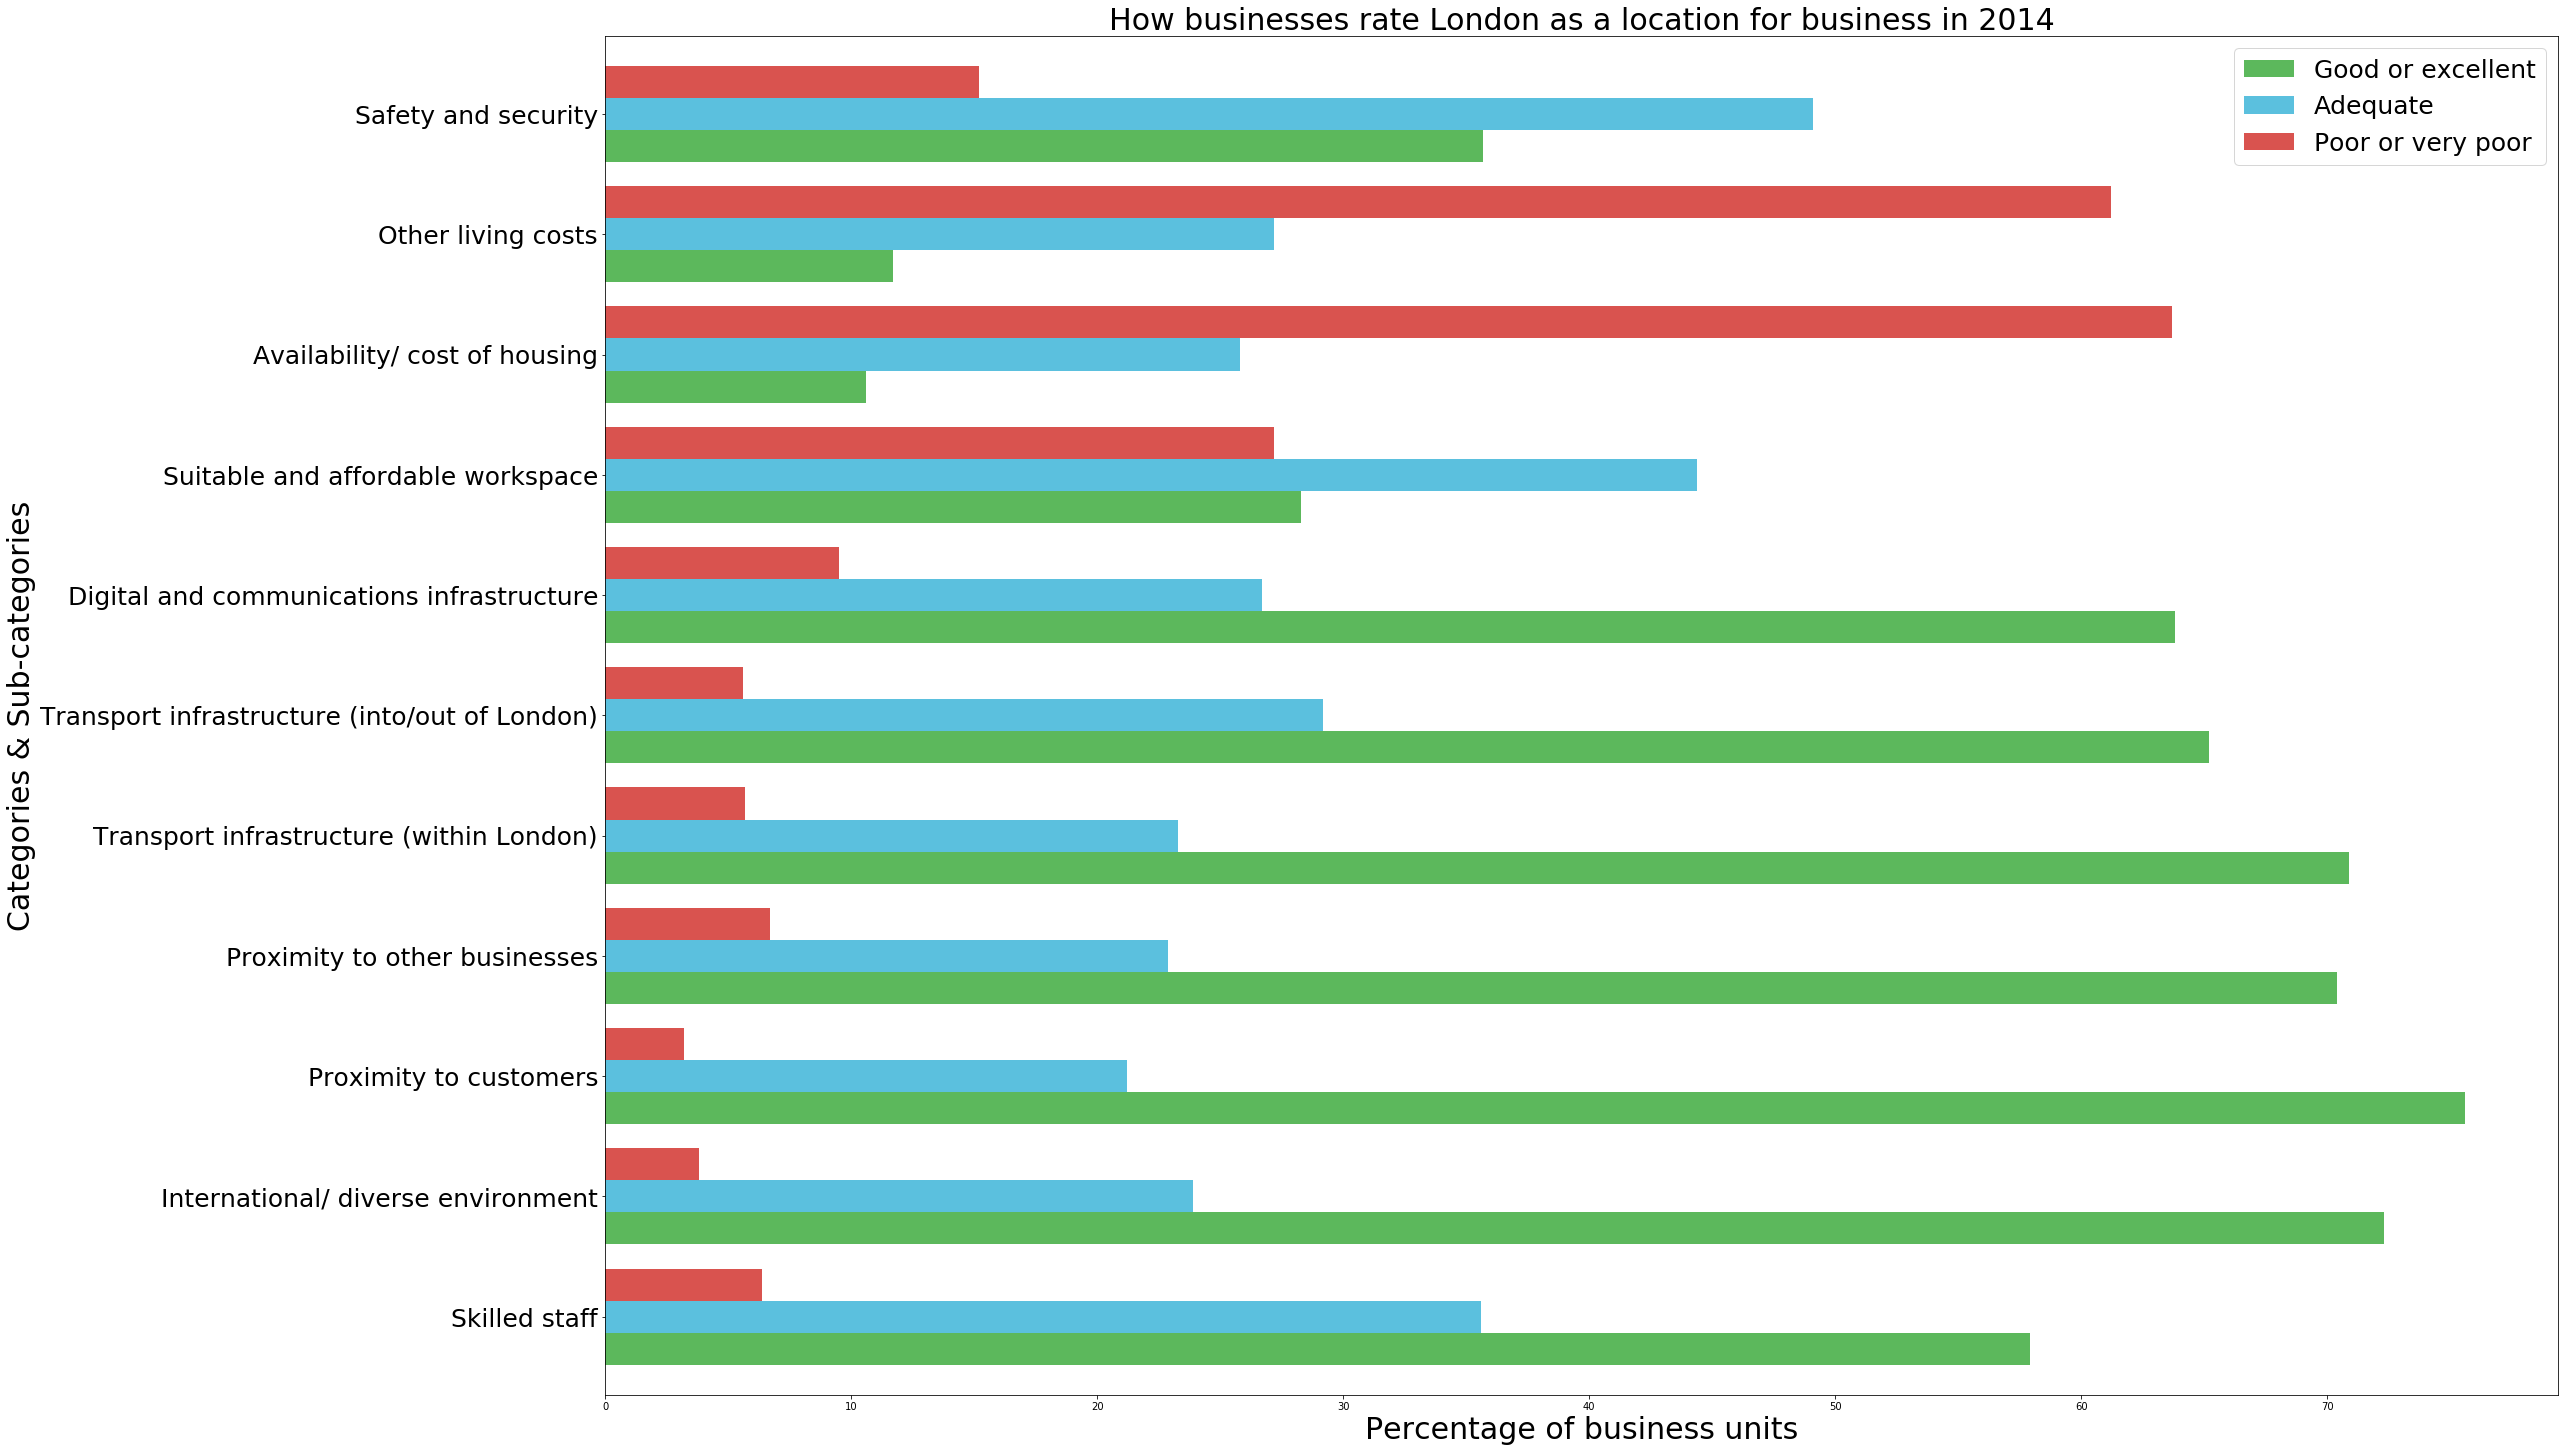

In [37]:
# Step 3 - Plot Bar graph for the combined datarame showing How businesses rate London as a location for business in 2014
from matplotlib.figure import Figure # import Figure artist 
fig=Figure()

ax=fig.add_subplot(111) # create an axes artist
ax=LDN_Rating_Factors.plot(kind='barh',figsize=(35,25),width=0.8,color=['#5cb85c','#5bc0de','#d9534f'])
ax.set_title("How businesses rate London as a location for business in 2014",fontsize=30)
ax.set_xlabel("Percentage of business units",fontsize=30)
ax.set_ylabel("Categories & Sub-categories",fontsize=30)
ax.yaxis.set_tick_params(labelsize=25)

ax.legend(fontsize=25,loc=0)

**10. Factors affecting businesses in London in 2014** - (Source: 2014 London Business Survey (LBS))
<br> This measure contains information on factors affecting business outlook in London in 2014. It acts as tool to assess business environment in London during recent periods. The survey is presented by all enterprises, sizes & industry sectors as a percentage of business units.

Here also, we have restricted our data to comprise of only Accommodation, food, travel and tourism industry in particular. Businesses have rated all the factors in London & put it into 3 sub categories Good or Excellent, Adequate & Poor or very poor.

In [38]:
# Download excel from the data source link below to get the data
# Source link - https://data.london.gov.uk/dataset/london-business-survey-2014-london-as-a-place-to-do-business
## Step 1a - Gather & pre-process data for Subcategory 1 (Positive or very positive impact):-

Business_Factors= pd.read_excel('Factors affect businesses.xlsx',sheet_name='FAB1 percents',
skiprows=range(19),skipfooter=58,header=0,names=['Category & sub-category','pop','Industrial category','Demand',
                                                'Availability of inputs','Cost of materials','Cost of energy',
                                                'Availability of staff with appropriate skills','Staff costs/ cost of living',
                                                'Availability of affordable business space','Availability and/or cost of finance','Government regulations',
                                                'Taxes and business rates','Technology/digital infrastructure','Public transport','Rail infrastructure',
                                                'Road infrastructure','Air infrastructure','Closeness to residential area(s)'])


Business_Factors=pd.DataFrame(Business_Factors)
Business_Factors['Category & sub-category']=['Positive or very positive impact']
Business_Factors.drop([Business_Factors.columns[1]], axis=1, inplace=True)
Business_Factors

,Category & sub-category,Industrial category,Demand,Availability of inputs,Cost of materials,Cost of energy,Availability of staff with appropriate skills,Staff costs/ cost of living,Availability of affordable business space,Availability and/or cost of finance,Government regulations,Taxes and business rates,Technology/digital infrastructure,Public transport,Rail infrastructure,Road infrastructure,Air infrastructure,Closeness to residential area(s)
0,Positive or very positive impact,"Accommodation, food, travel and tourism",48.1,23,12.7,11.3,21.5,13.6,4.2,4.8,8.6,10.1,29.5,24.3,18.2,12.2,12.8,31.3


In [39]:
## Step 1b - Gather & pre-process data for Subcategory 2 (No impact):-
Business_Factors2= pd.read_excel('Factors affect businesses.xlsx',sheet_name='FAB1 percents',
skiprows=range(42),skipfooter=35,header=0,names=['Category & sub-category','pop','Industrial category','Demand',
                                                'Availability of inputs','Cost of materials','Cost of energy',
                                                'Availability of staff with appropriate skills','Staff costs/ cost of living',
                                                'Availability of affordable business space','Availability and/or cost of finance','Government regulations',
                                                'Taxes and business rates','Technology/digital infrastructure','Public transport','Rail infrastructure',
                                                'Road infrastructure','Air infrastructure','Closeness to residential area(s)'])

Business_Factors2=pd.DataFrame(Business_Factors2)
Business_Factors2['Category & sub-category']=['No impact']
Business_Factors2.drop([Business_Factors2.columns[1]], axis=1, inplace=True)
Business_Factors2

,Category & sub-category,Industrial category,Demand,Availability of inputs,Cost of materials,Cost of energy,Availability of staff with appropriate skills,Staff costs/ cost of living,Availability of affordable business space,Availability and/or cost of finance,Government regulations,Taxes and business rates,Technology/digital infrastructure,Public transport,Rail infrastructure,Road infrastructure,Air infrastructure,Closeness to residential area(s)
0,No impact,"Accommodation, food, travel and tourism",27,63.7,25.8,22.6,43,28.7,65.3,55.3,46.7,29.2,61.6,53.1,69.9,63.1,78,61.1


In [40]:
## Step 1c - Gather & pre-process data for Subcategory 3 (Negative or very negative impact):-
Business_Factors3= pd.read_excel('Factors affect businesses.xlsx',sheet_name='FAB1 percents',
skiprows=range(65),skipfooter=12,header=0,names=['Category & sub-category','pop','Industrial category','Demand',
                                                'Availability of inputs','Cost of materials','Cost of energy',
                                                'Availability of staff with appropriate skills','Staff costs/ cost of living',
                                                'Availability of affordable business space','Availability and/or cost of finance','Government regulations',
                                                'Taxes and business rates','Technology/digital infrastructure','Public transport','Rail infrastructure',
                                                'Road infrastructure','Air infrastructure','Closeness to residential area(s)'])

Business_Factors3=pd.DataFrame(Business_Factors3)
Business_Factors3['Category & sub-category']=['Negative or very negative impact']
Business_Factors3.drop([Business_Factors3.columns[1]], axis=1, inplace=True)
Business_Factors3

,Category & sub-category,Industrial category,Demand,Availability of inputs,Cost of materials,Cost of energy,Availability of staff with appropriate skills,Staff costs/ cost of living,Availability of affordable business space,Availability and/or cost of finance,Government regulations,Taxes and business rates,Technology/digital infrastructure,Public transport,Rail infrastructure,Road infrastructure,Air infrastructure,Closeness to residential area(s)
0,Negative or very negative impact,"Accommodation, food, travel and tourism",24.9,13.3,61.5,66.1,35.5,57.6,30.5,39.9,44.7,60.7,8.9,22.6,11.9,24.7,9.1,7.6


In [41]:
# Step 2 - Combine the 3 sub-category data frames scraped from the survey result into one data frame
Business_Factors_LDN=pd.concat([Business_Factors,Business_Factors2,Business_Factors3],axis=0)
Business_Factors_LDN.drop([Business_Factors_LDN.columns[1]], axis=1, inplace=True)
Business_Factors_LDN.set_index(['Category & sub-category'],inplace=True)
Business_Factors_LDN=Business_Factors_LDN.transpose()
Business_Factors_LDN

Category & sub-category,Positive or very positive impact,No impact,Negative or very negative impact
Demand,48.1,27.0,24.9
Availability of inputs,23.0,63.7,13.3
Cost of materials,12.7,25.8,61.5
Cost of energy,11.3,22.6,66.1
Availability of staff with appropriate skills,21.5,43.0,35.5
Staff costs/ cost of living,13.6,28.7,57.6
Availability of affordable business space,4.2,65.3,30.5
Availability and/or cost of finance,4.8,55.3,39.9
Government regulations,8.6,46.7,44.7
Taxes and business rates,10.1,29.2,60.7


Like in the earlier survey rating London as a business destination cost of materials, cost of energy, Staff cost of living, Taxes & business rates are some factors having negative impact on businesses in London as per the 2014 survey results below. 

Other than these most of the factors like transport, technology infrastructure & demand had either no impact or positive impact for investors in business here.

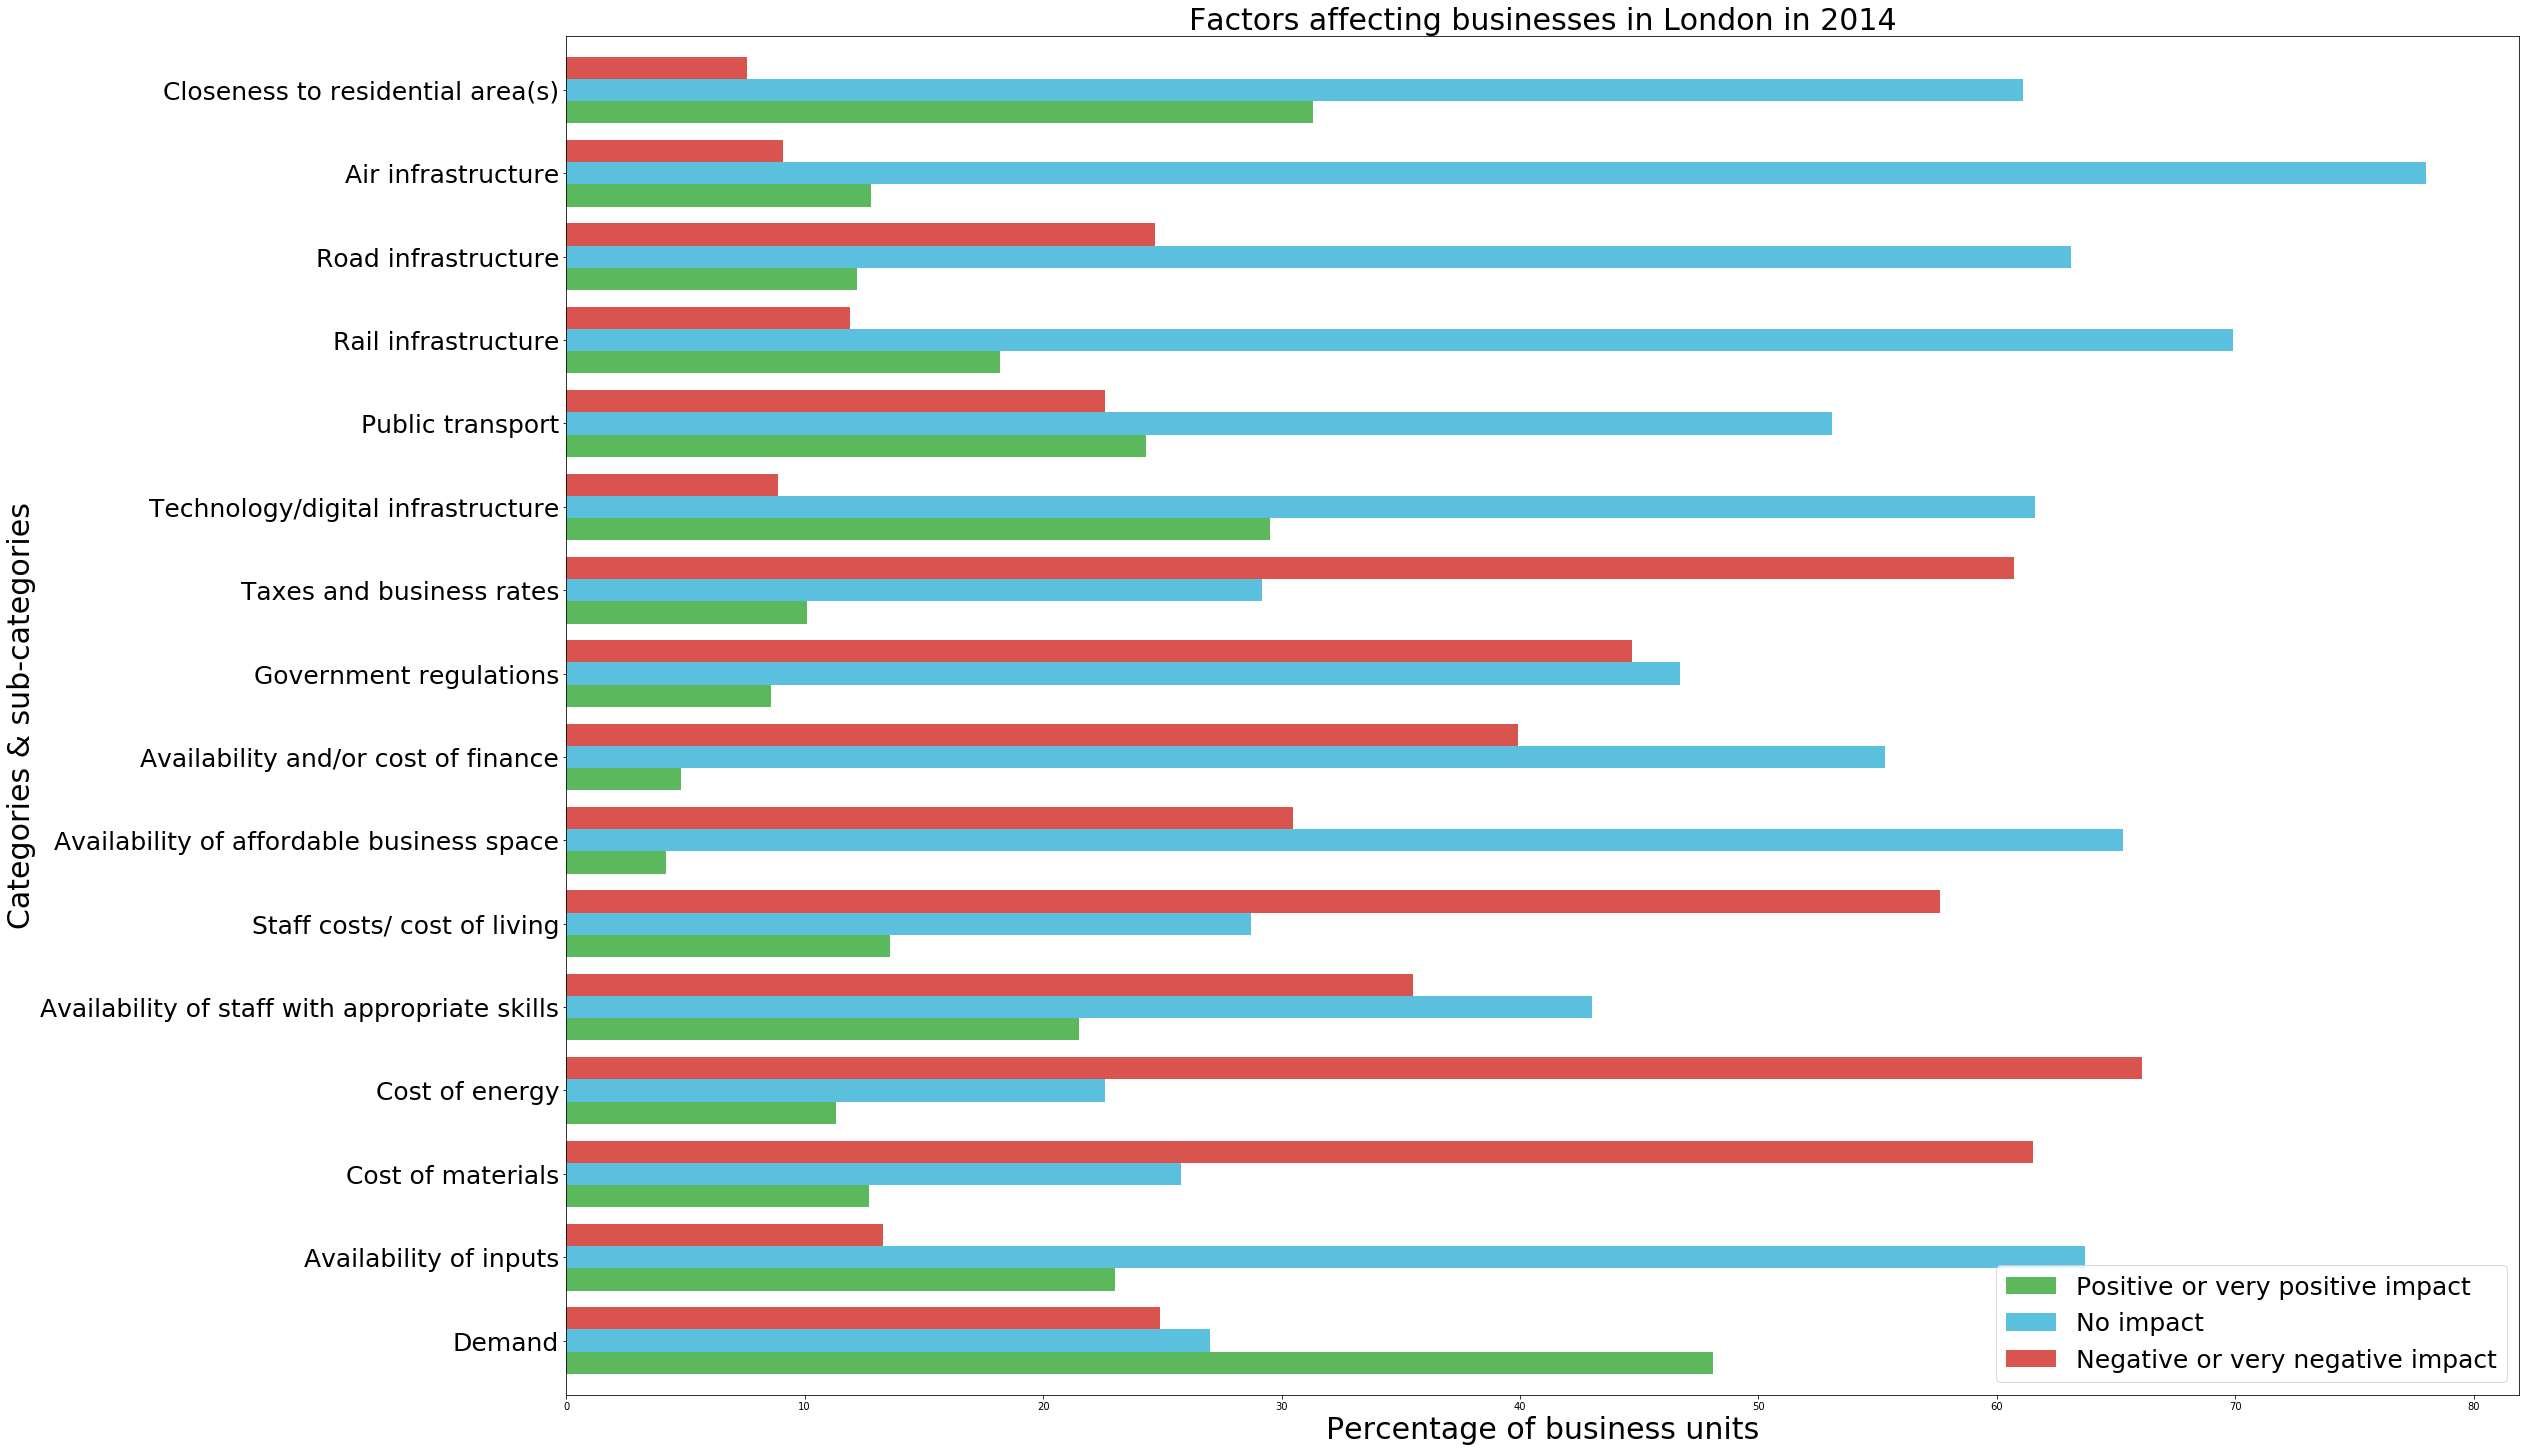

In [42]:
# Step 3 - Plot Horiontal Bar graph for Factors affecting businesses in London in 2014
from matplotlib.figure import Figure # import Figure artist 
fig=Figure()

ax=fig.add_subplot(111) # create an axes artist
ax=Business_Factors_LDN.plot(kind='barh',figsize=(35,25),width=0.8,color=['#5cb85c','#5bc0de','#d9534f'])
ax.set_title("Factors affecting businesses in London in 2014",fontsize=30)
ax.set_xlabel("Percentage of business units",fontsize=30)
ax.set_ylabel("Categories & sub-categories",fontsize=30)
ax.yaxis.set_tick_params(labelsize=25)
ax.legend(fontsize=25,loc='lower right')

#### Micro Level Data Analysis -
Now, that we have analyzed all the macro-level factors and their data let's start by analysing micro-level data. 

**1. List of areas of London** - (Source: Wikipedia page)
<br> Inorder to use location data services for London first we need to get the London neighborhood areas and their coordinates. So, here we srape through the Wikipedia page to extract table listing down major locations in London with their Post Codes, OS grid reference & their respective London boroughs.

Firstly, we try to extract a list of Areas in London and their corresponding London Boroughs from Wikipedia page. London is administered by the City of London and 32 London boroughs.

In [282]:
# Scrape the Wikipedia page to extract HTML text script
import requests
from lxml.html import fromstring
wikipedia_url = requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text

from bs4 import BeautifulSoup
soup=BeautifulSoup(wikipedia_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of areas of London - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_areas_of_London","wgTitle":"List of areas of London","wgCurRevisionId":893805096,"wgRevisionId":893805096,"wgArticleId":11915713,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Articles with Geo","Articles with OS grid coordinates","Commons category link is locally defined","Areas of London","Geography of London","Lists of places in London","Lists of neighbourhoods"],"wgBreakFrames":!1,"wgPageContentLanguage"

In [283]:
# Find class ‘wikitable sortable’ in the HTML script
My_table=soup.find('table',{'class':'wikitable sortable'})

# Get all the tables
tables = soup.find_all('table',class_="wikitable")

# extract the content
contents = [item.get_text() for item in tables[0].find_all('td')]

In [292]:
# Clean the data table, convert to dataframe with column headers
import pandas as pd
data_head=['Location', 'London borough','Post town','Postcode district','Dial code','OS grid ref']
data = list(zip(*[iter(contents)]*6))
London_neighbourhoods = pd.DataFrame(data[0:], columns=data_head)
London_neighbourhoods=London_neighbourhoods.drop(columns=['Post town','Postcode district','Dial code','OS grid ref'])
for column in London_neighbourhoods.columns:
    London_neighbourhoods['London borough'] = London_neighbourhoods['London borough'].str.replace(r"\[.*\]", "")
London_neighbourhoods.head(5)

,Location,London borough
0,Abbey Wood,"Bexley, Greenwich"
1,Acton,"Ealing, Hammersmith and Fulham"
2,Addington,Croydon
3,Addiscombe,Croydon
4,Albany Park,Bexley


Multiple London boroughs are listed against some Locations in London for example Acton location has Ealing, Hammersmith and Fulham as its London boroughs. Therefore, for ease of mapping them to respective coordinates we have selected only one of the London boroughs against these locations. 

So, now Acton location has its London borough as Ealing and coordinates of Ealing are shown in the latitude & longitude columns. Likewise, we have done the same approimations for some other locations as well. 

In [293]:
# Renaming the London Boroughs for some Locations so as to ensure ease of mapping them.
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Sutton, Kingston upon Thames'},'Sutton')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Redbridge, Waltham Forest'},'Redbridge')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Ealing, Hammersmith and Fulham'},'Ealing')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': "Bexley, Greenwich"},'Bexley')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'City'},'City of London')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Islington & City'},'Islington')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Haringey, Islington'},'Haringey')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Greenwich, Lewisham'},'Greenwich')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Lambeth, Southwark'},'Lambeth')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Brent, Harrow'},'Brent')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Brent, Camden'},'Brent')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Camden and Islington'},'Camden')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Haringey and Barnet'},'Haringey')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Brent, Ealing'},'Brent')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Harrow, Brent'},'Harrow')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Bexley, Bromley'},'Bexley')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Brent, Ealing, Harrow'},'Brent')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Lewisham, Southwark'},'Lewisham')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'City, Westminster'},'City of London')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Lewisham, Bromley'},'Lewisham')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Hammersmith and Fulham'},'Westminster')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'City of London'},'Westminster')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Greenwich'},'Lewisham')
London_neighbourhoods= London_neighbourhoods.replace({'London borough': 'Barking and Dagenham'},'Bexley')

London_neighbourhoods.head(5)

,Location,London borough
0,Abbey Wood,"Bexley, Greenwich"
1,Acton,Ealing
2,Addington,Croydon
3,Addiscombe,Croydon
4,Albany Park,Bexley


**2. List of London Boroughs & their Coordinates** - (Source: Wikipedia page)
<br> Next, we want to get the coordinates data for each of the London Boroughs. This data is also derived by scraping through a Wikipedia page as shown below.Then we will regroup  format them to find latitudes & longitudes for each of them.

In [286]:
# Scrape wikipedia page to extract HTML text script
import requests
from lxml.html import fromstring
wikipedia_url2 = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text

from bs4 import BeautifulSoup
soup2=BeautifulSoup(wikipedia_url2,'lxml')
print(soup2.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":881899861,"wgRevisionId":881899861,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Articles with Geo","London boroughs","Lists of places in London"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat"

In [287]:
# Get all the tables
tables2 = soup2.find_all('table',class_="wikitable")

# extract the content
contents2 = [item.get_text() for item in tables2[0].find_all('td')]

In [383]:
# Clean the data table, convert to dataframe with column headers
import pandas as pd
data_head2=['Borough', 'Inner', 'Status','Local authority','Political control','Headquarters','Area (sq mil)','Population (2013 est)',
           'Coordinates','Nr. in map']
data2 = list(zip(*[iter(contents2)]*10))
London_neighbourhoods2 = pd.DataFrame(data2[0:], columns=data_head2)
London_neighbourhoods2=London_neighbourhoods2.drop(columns=['Inner', 'Status','Local authority','Political control','Headquarters',
                                                            'Area (sq mil)','Population (2013 est)','Nr. in map'])
London_neighbourhoods2['Borough'] = London_neighbourhoods2['Borough'].str.rstrip('\n')
for column in London_neighbourhoods2.columns:
    London_neighbourhoods2['Borough'] = London_neighbourhoods2['Borough'].str.replace(r"\[.*\]", "")
    London_neighbourhoods2['Coordinates'] = London_neighbourhoods2['Coordinates'].str[23:]
    London_neighbourhoods2['Coordinates'] = London_neighbourhoods2['Coordinates'].str.rstrip('\n')
    London_neighbourhoods2['Latitude'] = London_neighbourhoods2['Coordinates'].str[:8]
    London_neighbourhoods2['Longitude1'] = London_neighbourhoods2['Coordinates'].str[:16]
    London_neighbourhoods2['Longitude'] = London_neighbourhoods2['Longitude1'].str[9:]
London_neighbourhoods2=London_neighbourhoods2.drop(columns=['Coordinates', 'Longitude1'])
    

London_neighbourhoods2.rename(columns={'Borough':'London borough'},inplace=True)
London_neighbourhoods2

,London borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.151
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.281
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.125
6,Croydon,51.3714,-0.097
7,Ealing,51.5130,-0.308
8,Enfield,51.6538,-0.079
9,Greenwich,51.4892,0.0648


Now that we have listed all the locations in London and London Boroughs alongwith their respective coordinates we combine this data into a combined dataframe to ease further mapping & analysis.

In [297]:
# Combine and merge London area data with the Borough related data into a combined data frame.
London_neighbourhoods3=London_neighbourhoods.merge(London_neighbourhoods2,on='London borough',how='left')
London_neighbourhoods3.head(10)

,Location,London borough,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",NaN,NaN
1,Acton,Ealing,51.5130,-0.308
2,Addington,Croydon,51.3714,-0.097
3,Addiscombe,Croydon,51.3714,-0.097
4,Albany Park,Bexley,51.4549,0.1505
5,Aldborough Hatch,Redbridge,51.5590,0.0741
6,Aldgate,Westminster,51.4973,-0.137
7,Aldwych,Westminster,51.4973,-0.137
8,Alperton,Brent,51.5588,-0.281
9,Anerley,Bromley,51.4039,0.0198


In [312]:
# Group & organize the combine dataframe into one row with the neighborhoods separated with a comma
Combined_LondonNeighbourhoods = London_neighbourhoods3.groupby(['Location','Latitude','Longitude'],sort=False,as_index=False).agg(','.join)

# Clean & organize the London Neighbourhood dataframe
Combined_LondonNeighbourhoods=Combined_LondonNeighbourhoods[['London borough','Location','Latitude','Longitude']]

# Format the Coordinates data into floats
Combined_LondonNeighbourhoods['Latitude']=Combined_LondonNeighbourhoods['Latitude'].astype(float)
Combined_LondonNeighbourhoods['Longitude']=Combined_LondonNeighbourhoods['Longitude'].astype(float)

Combined_LondonNeighbourhoods.head(5)

,London borough,Location,Latitude,Longitude
0,Ealing,Acton,51.5130,-0.3080
1,Croydon,Addington,51.3714,-0.0970
2,Croydon,Addiscombe,51.3714,-0.0970
3,Bexley,Albany Park,51.4549,0.1505
4,Redbridge,Aldborough Hatch,51.5590,0.0741


**3. London Neighborhoods Data Visualization** (using Folium Maps) - 
<br>As we move further into our micro-level analysis for London neighborhoods we now need to explore & map location data using Folium maps. In this regard, we first need to get the geographical coordinates of London using the geopy library.

In [303]:
## Explore and cluster the neighborhoods in London
# Import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0
import folium # map rendering library

#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Libraries imported.


In [304]:
# Use geopy library to get the latitude and longitude values of London
address = 'London, United Kingdom'

geolocator=Nominatim(user_agent='tor_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinates of London are {},{}.'.format(latitude,longitude))

The geographical coordinates of London are 51.5073219,-0.1276474.


Then, we use these coordinates of London to create a map of London displaying London Boroughs superimposed on top of that using Folium library.

In [308]:
# Create a map of London with neighborhoods superimposed on top
map_london=folium.Map(location=[latitude,longitude],zoom_start=10)

# Add markers to map
for lat,lng,borough,neighbourhood in zip(Combined_LondonNeighbourhoods['Latitude'],
                                         Combined_LondonNeighbourhoods['Longitude'],
                                         Combined_LondonNeighbourhoods['London borough'],
                                         Combined_LondonNeighbourhoods['Location']):
    label='{},{}'.format(neighbourhood,borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,
                       parse_html=False).add_to(map_london)
    
map_london

### **Explore & Cluster Sushi Restaurants in London** (using Foursquare API) -

Now, let's use Foursquare API to get info on Sushi restaurants around the center of London.We're interested in venues only with 'Sushi' category therefore, have defined our search query with the same criteria.

In [309]:
# Import libraries -
import pandas as pd
import numpy as np

import requests  # library to handle requests
import random   # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [310]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'HVVA5BLOQCAVMPAP3N0NXK1XOCONKOVDNFDNY1GSSVSPE231' # your Foursquare ID
CLIENT_SECRET = 'CLZTLHZY1IAD5WWUKHEW55R24RGKG1DG3E5AQZTBHX3UI4V0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HVVA5BLOQCAVMPAP3N0NXK1XOCONKOVDNFDNY1GSSVSPE231
CLIENT_SECRET:CLZTLHZY1IAD5WWUKHEW55R24RGKG1DG3E5AQZTBHX3UI4V0


In [311]:
# Converting the London city location to its latitude and longitude coordinates
## In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent.
address = 'London, United Kingdom'

geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude

print(latitude,longitude)

51.5073219 -0.1276474


In [363]:
# Searching for Sushi restaurant,so, let's define a query to search those in metres from the London city location:-
search_query='Sushi'
print(search_query+ '.....OK!')

# Define the corresponding URL:-
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query,LIMIT)

Sushi.....OK!


In [364]:
# Send the GET Request and examine the results:-
results=requests.get(url).json()

# Assign a relevent part of JSON to venues
venues = results['response']['venues']

# Transform venues into a pandas dataframe
dataframe=json_normalize(venues)

In [365]:
# Define information of interest and filter dataframe
filtered_columns=['name','categories']+[col for col in dataframe.columns if col.startswith('location.')]+['id']
dataframe_filtered=dataframe.loc[:,filtered_columns]

# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list=row['categories']
    except: 
        categories_list=row['venue.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

# Filter the category for each venue 
dataframe_filtered['categories']=dataframe_filtered.apply(get_category_type,axis=1)

# Clean column names by keeping only last term
dataframe_filtered.columns=[column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,YO! Sushi,Sushi Restaurant,"Festival Riverside, Royal Festival Hall",GB,City of Westminster,United Kingdom,Southbank Centre,713,"[Festival Riverside, Royal Festival Hall (Sout...","[{'label': 'display', 'lat': 51.50624666437051...",51.506247,-0.117494,London,SE1 8XX,Greater London,4c63b33b58810f470c5b0a1e
1,YO! Sushi,Sushi Restaurant,"Unit 2/3, The Balcony, London Waterloo Railway...",GB,London,United Kingdom,NaN,1094,"[Unit 2/3, The Balcony, London Waterloo Railwa...","[{'label': 'display', 'lat': 51.50324800882733...",51.503248,-0.113278,"Waterloo, London, Greater London",SE1 7LY,Greater London,5007ef30e4b06e1d97e1e812
2,Sushi Eatery,Sushi Restaurant,40 Frith St,GB,London,United Kingdom,NaN,681,"[40 Frith St, London, Greater London, W1D 5LN,...","[{'label': 'display', 'lat': 51.51305521326157...",51.513055,-0.131108,NaN,W1D 5LN,Greater London,4aeb59b8f964a52043c121e3
3,Sticks'n'Sushi,Sushi Restaurant,11 Henrietta St,GB,London,United Kingdom,NaN,497,"[11 Henrietta St, London, Greater London, WC2E...","[{'label': 'display', 'lat': 51.511038, 'lng':...",51.511038,-0.123655,NaN,WC2E 8PY,Greater London,527bee27498e2ccd501fe6dc
4,Tsukiji Sushi,Sushi Restaurant,37 Conduit St,GB,Mayfair,United Kingdom,NaN,1159,"[37 Conduit St, Mayfair, Greater London, W1S 2...","[{'label': 'display', 'lat': 51.51134910786355...",51.511349,-0.143086,NaN,W1S 2YF,Greater London,4c6da0114d24b60ce56ad6d8
5,Samurai Sushi & Bento,Sushi Restaurant,Shaftsbury Ave,GB,London,United Kingdom,Rupert St,609,"[Shaftsbury Ave (Rupert St), London, Greater L...","[{'label': 'display', 'lat': 51.51184023631741...",51.511840,-0.132615,NaN,NaN,Greater London,4b227af1f964a5207c4724e3
6,Hikari Sushi & Noodle Bar,Sushi Restaurant,2 Kennington Rd,GB,London,United Kingdom,NaN,1464,"[2 Kennington Rd, London, Greater London, SE1 ...","[{'label': 'display', 'lat': 51.49816395022403...",51.498164,-0.112481,"Lambeth, London, Greater London",SE1 7BL,Greater London,562a7b57498eef10bf840a66
7,YO! Sushi,Sushi Restaurant,"Condor House, 5-14 St Pauls Church Yard",GB,London,United Kingdom,NaN,2043,"[Condor House, 5-14 St Pauls Church Yard, Lond...","[{'label': 'display', 'lat': 51.51363870933694...",51.513639,-0.099954,NaN,EC4M 8AY,Greater London,4b59b669f964a5202b9428e3
8,Bon Bori (aka Flying Fish Sushi),Sushi Restaurant,85 Scoresby Street,GB,London,United Kingdom,NaN,1683,"[85 Scoresby Street, London, Greater London, S...","[{'label': 'display', 'lat': 51.50436315639179...",51.504363,-0.103827,NaN,SE1 0XN,Greater London,4d662d7059afa0905fd6913a
9,YO! Sushi,Sushi Restaurant,"Unit 30-32, The Brunswick",GB,Bloomsbury,United Kingdom,NaN,1919,"[Unit 30-32, The Brunswick, Bloomsbury, Greate...","[{'label': 'display', 'lat': 51.52440355682534...",51.524404,-0.123881,NaN,WC1N 1AE,Greater London,4ae20a02f964a5200f8a21e3


Listed below are the names of all the Sushi restaurants around the center of London city. We now use Folium to mark these venues superimposed on the map of London city center. As shown in the map below the red circle mark represents the center of London while the green circle marks locate all the Sushi restaurant venues around it.

In [318]:
# Let's visualize the Sushi restaurants that are nearby
dataframe_filtered.name

0                            YO! Sushi
1                            YO! Sushi
2                         Sushi Eatery
3                       Sticks'n'Sushi
4                        Tsukiji Sushi
5                Samurai Sushi & Bento
6            Hikari Sushi & Noodle Bar
7                            YO! Sushi
8                            YO! Sushi
9     Bon Bori (aka Flying Fish Sushi)
10                           YO! Sushi
11                     SUSHISAMBA City
12               Samurai Sushi & Bento
13                         Sushi Samba
14                           YO! Sushi
15                      Sushi Surprise
16                            Sushi-So
17                          Sasa Sushi
18                     Kulu Kulu Sushi
19                           YO! Sushi
20                       SW9 Sushi Bar
21                         Sushi Daily
22                     Kulu Kulu Sushi
23                       Sushi Atelier
24                          Sushi Waka
25                      H

In [319]:
# Generate map centred around the London city center
venues_map=folium.Map(location=[latitude,longitude],zoom_start=13)

# Add a red circle marker to represent the London city center
folium.features.CircleMarker([latitude,longitude],radius=10,color='red',popup='London City Center',fill=True,fill_color='red',
                            fill_opacity=0.6).add_to(venues_map)

# Add the Sushi restaurants as green circle markers
for lat,lng,label in zip(dataframe_filtered.lat,dataframe_filtered.lng,dataframe_filtered.categories):
    folium.features.CircleMarker([lat,lng],radius=5,color='green',popup=label,fill=True,fill_color='green',
                                 fill_opacity=0.6).add_to(venues_map)
    
# Display the map of London city with the center of London city & all the Sushi restaurant venues superimposed on them.
venues_map

After we have searched for & got all the 30 Sushi restaurant venues around London's center, let's explore their ratings as per Foursquare in order of their proximity to the center. 

In [321]:
# Let's explore the closest Sushi restaurant -- Sushi Samba
venue_id='5bfaddb4772fbc002c5b3dfc' # ID of Sushi Samba

url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
#print(result['response']['venue'].keys())
result['response']['venue']

# Get the venue's overall rating
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [322]:
# Let's check the rating of the second closest Sushi restaurant
venue_id='527bee27498e2ccd501fe6dc' # ID of Sticks'n'Sushi 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

9.1


In [323]:
# let's check the third closest restaurant
venue_id= '4acf2df7f964a5209bd220e3' # ID of Okawari sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

This venue has not been rated yet


In [324]:
# let's check the fourth closest restaurant
venue_id= '4b227af1f964a5207c4724e3' # ID of Samurai Sushi & Bento
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

This venue has not been rated yet


In [325]:
# let's check the fifth closest restaurant
venue_id= '4aeb59b8f964a52043c121e3' # ID of Sushi Eatery
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

6.3


In [326]:
# let's check the sixth closest restaurant
venue_id= '4c63b33b58810f470c5b0a1e' # ID of YO! Sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

6.1


In [332]:
# let's check the seventh closest restaurant
venue_id= '4b0b039af964a520942b23e3' # ID of Kulu Kulu Sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.7


In [334]:
# let's check the eighth closest restaurant
venue_id= '4ccc2d3532e776b02c78da27' # ID of Ichi Sushi & Sashimi Bar
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.2


In [335]:
# let's check the ninth closest restaurant
venue_id= '5c27c3ad3fffb400252a1f49' # ID of Sushi Daily
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

This venue has not been rated yet


In [336]:
# let's check the tenth closest restaurant
venue_id= '4c6da0114d24b60ce56ad6d8' # ID of Tsukiji Sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

6.6


In [337]:
# let's check the eleventh closest restaurant
venue_id= '4ba0d8c4f964a520dd8137e3' # ID of Samurai Sushi & Bento
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

This venue has not been rated yet


In [338]:
# let's check the twelfth closest restaurant
venue_id= '562a7b57498eef10bf840a66' # ID of Hikari Sushi & Noodle Bar
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

5.5


In [339]:
# let's check the thirteenth closest restaurant
venue_id= '4d662d7059afa0905fd6913a' # ID of Bon Bori (aka Flying Fish Sushi)
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

6.6


In [340]:
# let's check the fourteenth closest restaurant
venue_id= '59711ed5dab4b13490f17249' # ID of Sushi Atelier 
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

8.9


In [341]:
# let's check the fifteenth closest restaurant
venue_id= '4b6abb48f964a520f7dd2be3' # ID of YO! Sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.1


In [342]:
# let's check the sixteenth closest restaurant
venue_id= '4dc7e1f1e4cd169dc6863924' # ID of Sushi-So
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

This venue has not been rated yet


In [343]:
# let's check the seventeenth closest restaurant
venue_id= '4afd6dc2f964a520c32722e3' # ID of Sasa Sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.7


In [344]:
# let's check the eighteenth closest restaurant
venue_id= '4da1ee89d686b60c7638af28' # ID of SW9 Sushi Bar
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.5


In [345]:
# let's check the nineteenth closest restaurant
venue_id= '4fa1bbbee4b058e27d7beab7' # ID of SUSHISAMBA City 
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

9.1


In [346]:
# let's check the twentieth closest restaurant
venue_id= '4ad0800ff964a5203fd820e3' # ID of Kulu Kulu Sushi
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

6.2


In [347]:
# let's check the twenty-first closest restaurant
venue_id= '4ad4c835f964a520bafb20e3' # ID of Sushi Waka
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.4


In [348]:
# let's check the twenty-second closest restaurant
venue_id= '5661ce3f38fa50a7844e07bb' # ID of Sushi Surprise 
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

8.6


In [349]:
# let's check the twenty-third closest restaurant
venue_id= '535e53f1498ef304aaa1faee' # ID of Sakana Sushi Japanese Kitchen 
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')

7.9


While exploring Sushi restaurant venues in London there were some duplicate venue names in the filtered data frame. For example, YO! Sushi restaurant or the Kulu Kulu Sushi restaurants are chains of Sushi restaurants located in different locations across London. Each outlets of these chain of restaurants was regarded as a separate venue in our search result. Inorder to have unique list of restaurants we compared the ratings of each of these outlets and considered only the highest rated outlet as one venue option representing the entire restaurant chain in my analysis. Therefore, the highest YO! Sushi restaurant was considered as one option for our analysis further. 

Based on their ratings in Foursquare now, let's summarize the Top 5 Sushi Restaurants in London with there ratings as per Foursquare website & their distance from center of London city.

In [43]:
# Summary list of top 5 Sushi Restaurants in London
import pandas as pd

# Initialize list of lists 
data = [['SUSHISAMBA City',9.1,3368,'110 Bishopsgate','City of London'
],["Sticks'n'Sushi",9.1,497,'11 Henrietta St','Westminster & Camden'],['Sushi Atelier',8.9,1690,'114 Great Portland Street,West End','Westminster & Camden'],
             ['Sushi Surprise',8.6,3689,'52 Scrutton St','Hackney'],
        ['Sakana Sushi Japanese Kitchen',7.9,3913,'43A Commercial St','Tower Hamlets']]

# Create the pandas DataFrame 
Sushi_top5 = pd.DataFrame(data, columns = ['Restaurant Name', 'Rating',"Distance frm LDN's center(in mtrs)",'Address','London Neighborhood']) 
  
# Print dataframe 
Sushi_top5

,Restaurant Name,Rating,Distance frm LDN's center(in mtrs),Address,London Neighborhood
0,SUSHISAMBA City,9.1,3368,110 Bishopsgate,City of London
1,Sticks'n'Sushi,9.1,497,11 Henrietta St,Westminster & Camden
2,Sushi Atelier,8.9,1690,"114 Great Portland Street,West End",Westminster & Camden
3,Sushi Surprise,8.6,3689,52 Scrutton St,Hackney
4,Sakana Sushi Japanese Kitchen,7.9,3913,43A Commercial St,Tower Hamlets


Next,we need to explore and study the London Boroughs of Top 3 out of the list of Top 5 Sushi restaurants. So using the coordinates we found earlier firstly we'll superimpose them using Folium on the map of London. 

In [431]:
# London Boroughs pertaining to Top 5 restaurant venues with their corresponding coordinates
London_neighbourhoods2=London_neighbourhoods2.transpose()
Top5_SushiRest_Boroughs=London_neighbourhoods2[[5,10,28,31]]
Top5_SushiRest_Boroughs=Top5_SushiRest_Boroughs.transpose()
Top5_SushiRest_Boroughs=Top5_SushiRest_Boroughs.append({'London borough':'City of London','Latitude':'51.5155','Longitude':'-0.0922'},ignore_index=True)

Top5_SushiRest_Boroughs['Latitude']=Top5_SushiRest_Boroughs['Latitude'].astype(float)
Top5_SushiRest_Boroughs['Longitude']=Top5_SushiRest_Boroughs['Longitude'].astype(float)

Top5_SushiRest_Boroughs

,London borough,Latitude,Longitude
0,Camden,51.5290,-0.1250
1,Hackney,51.5450,-0.0550
2,Tower Hamlets,51.5099,-0.0050
3,Westminster,51.4973,-0.1370
4,City of London,51.5155,-0.0922


In [403]:
## Explore and cluster the neighborhoods in London
# Import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 
import folium # map rendering library

#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Use geopy library to get the latitude and longitude values of London
address = 'London, United Kingdom'

geolocator=Nominatim(user_agent='tor_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinates of London are {},{}.'.format(latitude,longitude))

The geographical coordinates of London are 51.5073219,-0.1276474.


In [404]:
# Create a map of London with neighborhoods superimposed on top
LDNmap_Top5_RestBoroughs=folium.Map(location=[latitude,longitude],zoom_start=10)

# Add blue markers to map
for lat,lng,borough in zip(Top5_SushiRest_Boroughs['Latitude'],
                                         Top5_SushiRest_Boroughs['Longitude'],
                                         Top5_SushiRest_Boroughs['London borough']):
    label='{}'.format(borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,
                       parse_html=False).add_to(LDNmap_Top5_RestBoroughs)
    
LDNmap_Top5_RestBoroughs

Further, we analyse the location addresses for each of the Top 3 Sushi restaurants one by one using Foursquare location data.

In [405]:
# Converting the SUSHISAMBA City Restaurant's location to its latitude and longitude coordinates
address = '110 Bishopsgate, Greater London'

geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude

print(latitude,longitude)

51.51625345 -0.0808203018163526


In [406]:
# Define the corresponding URL:-
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,LIMIT)

# Send the GET Request and examine the results:-
results=requests.get(url).json()

# Assign a relevent part of JSON to venues -
venues = results['response']['venues']

# Transform venues into a pandas dataframe - 
dataframe=json_normalize(venues)

In [407]:
# Define information of interest and filter dataframe - 
filtered_columns=['name','categories']+[col for col in dataframe.columns if col.startswith('location.')]+['id']
dataframe_filtered=dataframe.loc[:,filtered_columns]

# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list=row['categories']
    except: 
        categories_list=row['venue.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

# Filter the category for each venue -
dataframe_filtered['categories']=dataframe_filtered.apply(get_category_type,axis=1)

# Clean column names by keeping only last term -
dataframe_filtered.columns=[column.split('.')[-1] for column in dataframe_filtered.columns]

# Replace NaN in neighborhood column with name of corresponding Borough -
dataframe_filtered['neighborhood'] = dataframe_filtered['neighborhood'].replace(np.nan, 'Bishopsgate')
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Duck & Waffle,Cocktail Bar,"110 Bishopsgate,40th Floor",GB,London,United Kingdom,at Camomile St,17,"[110 Bishopsgate,40th Floor (at Camomile St), London, Greater London, EC2N 4AY, United Kingdom]","[{'label': 'display', 'lat': 51.516108085718514, 'lng': -0.08092590729047038}]",51.516108,-0.080926,Bishopsgate,EC2N 4AY,Greater London,5012dbe9e4b07ac9f1400222
1,Salesforce Tower,Building,110 Bishopsgate,GB,London,United Kingdom,NaN,13,"[110 Bishopsgate, London, Greater London, EC2N 4AY, United Kingdom]","[{'label': 'display', 'lat': 51.51623408331608, 'lng': -0.08101344108581543}]",51.516234,-0.081013,Bishopsgate,EC2N 4AY,Greater London,4ad4ee47f964a520bafc20e3
2,SUSHISAMBA City,Sushi Restaurant,110 Bishopsgate,GB,London,United Kingdom,at Camomile St,24,"[110 Bishopsgate (at Camomile St), London, Greater London, EC2N 4AY, United Kingdom]","[{'label': 'display', 'lat': 51.5161706567293, 'lng': -0.08114755153656006}]",51.516171,-0.081148,Bishopsgate,EC2N 4AY,Greater London,4fa1bbbee4b058e27d7beab7
3,The Drift,Cocktail Bar,110 Bishopsgate,GB,London,United Kingdom,at Camomile St,13,"[110 Bishopsgate (at Camomile St), London, Greater London, EC2N 4AY, United Kingdom]","[{'label': 'display', 'lat': 51.516364884584696, 'lng': -0.08090678893824428}]",51.516365,-0.080907,Bishopsgate,EC2N 4AY,Greater London,4e12bed118a84f0f031fcb75
4,Bishopsgate,Neighborhood,NaN,GB,London,United Kingdom,NaN,252,"[Bishopsgate, Greater London, United Kingdom]",NaN,51.518524,-0.080965,Bishopsgate,NaN,Greater London,53150c08e4b0e72a36ea6ccb
5,Chamberlain’s Fish & Chips,Fish & Chips Shop,25 Leadenhall Market,GB,London,United Kingdom,NaN,453,"[25 Leadenhall Market, London, Greater London, EC3V 1LT, United Kingdom]","[{'label': 'display', 'lat': 51.512588, 'lng': -0.083681}]",51.512588,-0.083681,Bishopsgate,EC3V 1LT,Greater London,599add53018cbb237249f215
6,Camomile Street Library,Bookstore,12-20 Camomile Street,GB,London,United Kingdom,NaN,26,"[12-20 Camomile Street, London, Greater London, EC3A 7EX, United Kingdom]","[{'label': 'display', 'lat': 51.516013349999994, 'lng': -0.080817}]",51.516013,-0.080817,Bishopsgate,EC3A 7EX,Greater London,4b227d60f964a520a64724e3
7,London Liverpool Street Railway Station (LST) (London Liverpool Street Railway Station),Train Station,Bishopsgate,GB,London,United Kingdom,NaN,208,"[Bishopsgate, London, Greater London, EC2M 7PY, United Kingdom]",NaN,51.518005,-0.081889,Bishopsgate,EC2M 7PY,Greater London,4af47862f964a520d6f221e3
8,salesforce.com,Office,Salesforce Tower,GB,London,United Kingdom,110 Bishopsgate,53,"[Salesforce Tower (110 Bishopsgate), London, Greater London, EC2N 4AY, United Kingdom]","[{'label': 'display', 'lat': 51.515863780270394, 'lng': -0.08128350512666493}]",51.515864,-0.081284,Bishopsgate,EC2N 4AY,Greater London,4c319d01213c2d7f1a38345d
9,Search Party,Office,NaN,GB,London,United Kingdom,NaN,12,"[London, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.516332, 'lng': -0.080695}]",51.516332,-0.080695,Bishopsgate,NaN,Greater London,4e2afa0a6284b96d7b81e49a


In [408]:
# Converting the Sticks'n'Sushi Restaurant's location to its latitude and longitude coordinates
address = '11 Henrietta St, Greater London'

geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude

print(latitude,longitude)

51.510955 -0.123502801248707


In [412]:
# Define the corresponding URL:-
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,LIMIT)

# Send the GET Request and examine the results:-
results=requests.get(url).json()

# Assign a relevent part of JSON to venues -
venues = results['response']['venues']

# Transform venues into a pandas dataframe -
dataframe=json_normalize(venues)

In [466]:
# Define information of interest and filter dataframe
filtered_columns=['name','categories']+[col for col in dataframe.columns if col.startswith('location.')]+['id']
dataframe_filtered2=dataframe.loc[:,filtered_columns]

# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list=row['categories']
    except: 
        categories_list=row['venue.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

# Filter the category for each venue 
dataframe_filtered2['categories']=dataframe_filtered2.apply(get_category_type,axis=1)

# Clean column names by keeping only last term
dataframe_filtered2.columns=[column.split('.')[-1] for column in dataframe_filtered2.columns]

# Replace NaN in neighborhood column with name of corresponding Borough -
dataframe_filtered2['neighborhood'] = dataframe_filtered2['neighborhood'].replace(np.nan, 'City of Westminster')
dataframe_filtered2

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Co-op Food,Grocery Store,118-122 Great Portland St,GB,London,United Kingdom,NaN,23,"[118-122 Great Portland St, London, Greater London, W1W 6PS, United Kingdom]","[{'label': 'display', 'lat': 51.519578024311514, 'lng': -0.14251447117527874}]",51.519578,-0.142514,City of Westminster,W1W 6PS,Greater London,5587c740498eb412b9a05633
1,Pret A Manger,Sandwich Place,136 Great Portland St,GB,London,United Kingdom,New Cavendish Street,76,"[136 Great Portland St (New Cavendish Street), London, Greater London, W1W 6PY, United Kingdom]","[{'label': 'display', 'lat': 51.52014052196879, 'lng': -0.14265513627785836}]",51.520141,-0.142655,City of Westminster,W1W 6PY,Greater London,4bd8749d5cf276b0ac4b9d00
2,JOE & THE JUICE,Juice Bar,96-98 Great Portland Street,GB,London,United Kingdom,NaN,60,"[96-98 Great Portland Street, London, Greater London, W1W 6PB, United Kingdom]","[{'label': 'display', 'lat': 51.51897527482395, 'lng': -0.14230966189467822}]",51.518975,-0.142310,City of Westminster,W1W 6PB,Greater London,59c262590d173f17f3a13495
3,BBC Broadcasting House,TV Station,Portland Pl,GB,London,United Kingdom,NaN,132,"[Portland Pl, London, Greater London, W1A 1AA, United Kingdom]","[{'label': 'display', 'lat': 51.518627201569224, 'lng': -0.14346568182781735}]",51.518627,-0.143466,City of Westminster,W1A 1AA,Greater London,4ae811e5f964a5200cae21e3
4,Picture Restaurant,Restaurant,110 Great Portland St,GB,London,United Kingdom,NaN,17,"[110 Great Portland St, London, W1W 6PQ, United Kingdom]","[{'label': 'display', 'lat': 51.51939395546808, 'lng': -0.1423369773469208}]",51.519394,-0.142337,City of Westminster,W1W 6PQ,NaN,51c4acbc498edf9523619af7
5,Oxford Circus London Underground Station,Metro Station,Oxford St,GB,London,United Kingdom,Regent St,474,"[Oxford St (Regent St), London, Greater London, W1R 1AB, United Kingdom]","[{'label': 'display', 'lat': 51.51525803425088, 'lng': -0.1419028172844449}]",51.515258,-0.141903,City of Westminster,W1R 1AB,Greater London,4ace3173f964a520f9ce20e3
6,Double Negative Visual Effects Studio,Film Studio,160 Great Portland Street,GB,London,United Kingdom,NaN,193,"[160 Great Portland Street, London, Greater London, W1W 5QA, United Kingdom]","[{'label': 'display', 'lat': 51.52118595125506, 'lng': -0.14298267568987466}]",51.521186,-0.142983,City of Westminster,W1W 5QA,Greater London,514ac4e1e4b089e64d0cf2dd
7,Sushi Atelier,Sushi Restaurant,114 Great Portland Street,GB,London,United Kingdom,NaN,23,"[114 Great Portland Street, London, Greater London, W1W 6PH, United Kingdom]","[{'label': 'display', 'lat': 51.51939013762405, 'lng': -0.1424600291908215}]",51.519390,-0.142460,West End,W1W 6PH,Greater London,59711ed5dab4b13490f17249
8,Greggs,Bakery,111 Great Portland St,GB,London,United Kingdom,NaN,34,"[111 Great Portland St, London, Greater London, W1W 6QQ, United Kingdom]","[{'label': 'display', 'lat': 51.519698989153795, 'lng': -0.14258063940405907}]",51.519699,-0.142581,City of Westminster,W1W 6QQ,Greater London,52ab36e3498eb0a0e9c79315
9,Abokado,Sushi Restaurant,102 Great Portland Street,GB,London,United Kingdom,NaN,49,"[102 Great Portland Street, London, Greater London, W1W 6PD, United Kingdom]","[{'label': 'display', 'lat': 51.519097690009175, 'lng': -0.14241410816755978}]",51.519098,-0.142414,City of Westminster,W1W 6PD,Greater London,52cff4bb11d2cd42bfe676b9


In [414]:
# Converting the Sushi Atelier Restaurant's location to its latitude and longitude coordinates
address = '114 Great Portland Street, Greater London'

geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude

print(latitude,longitude)

51.51951625 -0.14218385000002


In [415]:
# Define the corresponding URL:-
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,LIMIT)

# Send the GET Request and examine the results:-
results=requests.get(url).json()

# Assign a relevent part of JSON to venues -
venues = results['response']['venues']

# Transform venues into a pandas dataframe -
dataframe=json_normalize(venues) 

In [416]:
# Define information of interest and filter dataframe
filtered_columns=['name','categories']+[col for col in dataframe.columns if col.startswith('location.')]+['id']
dataframe_filtered3=dataframe.loc[:,filtered_columns]

# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list=row['categories']
    except: 
        categories_list=row['venue.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

# Filter the category for each venue 
dataframe_filtered3['categories']=dataframe_filtered3.apply(get_category_type,axis=1)

# Clean column names by keeping only last term
dataframe_filtered3.columns=[column.split('.')[-1] for column in dataframe_filtered3.columns]

# Replace NaN in neighborhood column with name of corresponding Borough -
dataframe_filtered3['neighborhood'] = dataframe_filtered3['neighborhood'].replace(np.nan, 'West End')
dataframe_filtered3

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Co-op Food,Grocery Store,118-122 Great Portland St,GB,London,United Kingdom,NaN,23,"[118-122 Great Portland St, London, Greater London, W1W 6PS, United Kingdom]","[{'label': 'display', 'lat': 51.519578024311514, 'lng': -0.14251447117527874}]",51.519578,-0.142514,West End,W1W 6PS,Greater London,5587c740498eb412b9a05633
1,Pret A Manger,Sandwich Place,136 Great Portland St,GB,London,United Kingdom,New Cavendish Street,76,"[136 Great Portland St (New Cavendish Street), London, Greater London, W1W 6PY, United Kingdom]","[{'label': 'display', 'lat': 51.52014052196879, 'lng': -0.14265513627785836}]",51.520141,-0.142655,West End,W1W 6PY,Greater London,4bd8749d5cf276b0ac4b9d00
2,JOE & THE JUICE,Juice Bar,96-98 Great Portland Street,GB,London,United Kingdom,NaN,60,"[96-98 Great Portland Street, London, Greater London, W1W 6PB, United Kingdom]","[{'label': 'display', 'lat': 51.51897527482395, 'lng': -0.14230966189467822}]",51.518975,-0.142310,West End,W1W 6PB,Greater London,59c262590d173f17f3a13495
3,BBC Broadcasting House,TV Station,Portland Pl,GB,London,United Kingdom,NaN,132,"[Portland Pl, London, Greater London, W1A 1AA, United Kingdom]","[{'label': 'display', 'lat': 51.518627201569224, 'lng': -0.14346568182781735}]",51.518627,-0.143466,West End,W1A 1AA,Greater London,4ae811e5f964a5200cae21e3
4,Picture Restaurant,Restaurant,110 Great Portland St,GB,London,United Kingdom,NaN,17,"[110 Great Portland St, London, W1W 6PQ, United Kingdom]","[{'label': 'display', 'lat': 51.51939395546808, 'lng': -0.1423369773469208}]",51.519394,-0.142337,West End,W1W 6PQ,NaN,51c4acbc498edf9523619af7
5,Oxford Circus London Underground Station,Metro Station,Oxford St,GB,London,United Kingdom,Regent St,474,"[Oxford St (Regent St), London, Greater London, W1R 1AB, United Kingdom]","[{'label': 'display', 'lat': 51.51525803425088, 'lng': -0.1419028172844449}]",51.515258,-0.141903,West End,W1R 1AB,Greater London,4ace3173f964a520f9ce20e3
6,Double Negative Visual Effects Studio,Film Studio,160 Great Portland Street,GB,London,United Kingdom,NaN,193,"[160 Great Portland Street, London, Greater London, W1W 5QA, United Kingdom]","[{'label': 'display', 'lat': 51.52118595125506, 'lng': -0.14298267568987466}]",51.521186,-0.142983,West End,W1W 5QA,Greater London,514ac4e1e4b089e64d0cf2dd
7,Sushi Atelier,Sushi Restaurant,114 Great Portland Street,GB,London,United Kingdom,NaN,23,"[114 Great Portland Street, London, Greater London, W1W 6PH, United Kingdom]","[{'label': 'display', 'lat': 51.51939013762405, 'lng': -0.1424600291908215}]",51.519390,-0.142460,West End,W1W 6PH,Greater London,59711ed5dab4b13490f17249
8,Greggs,Bakery,111 Great Portland St,GB,London,United Kingdom,NaN,34,"[111 Great Portland St, London, Greater London, W1W 6QQ, United Kingdom]","[{'label': 'display', 'lat': 51.519698989153795, 'lng': -0.14258063940405907}]",51.519699,-0.142581,West End,W1W 6QQ,Greater London,52ab36e3498eb0a0e9c79315
9,Abokado,Sushi Restaurant,102 Great Portland Street,GB,London,United Kingdom,NaN,49,"[102 Great Portland Street, London, Greater London, W1W 6PD, United Kingdom]","[{'label': 'display', 'lat': 51.519097690009175, 'lng': -0.14241410816755978}]",51.519098,-0.142414,West End,W1W 6PD,Greater London,52cff4bb11d2cd42bfe676b9


After exploring the Top 3 restaurant venues we combine the results into a single data frame. We use one hot coding to further process the combined data frame. Firstly, we find out the number of venues returned for each Category & Neighborhood.

In [461]:
# Combine the data frames of Top 3 restaurant venues into a single one -
Combined_venues=pd.concat([dataframe_filtered,dataframe_filtered2,dataframe_filtered3],axis=0)


# Let's check how many venues were returned for each category and neighborhood
Explore_Top3_Venues=Combined_venues.groupby(['neighborhood','categories']).count()
Explore_Top3_Venues

name  address  \
neighborhood                  categories                                       
Bishopsgate                   Bookstore                        1     1         
                              Building                         1     1         
                              Church                           1     0         
                              Cocktail Bar                     2     2         
                              College Administrative Building  1     0         
                              Colombian Restaurant             1     1         
                              Coworking Space                  1     1         
                              Fish & Chips Shop                1     1         
                              Garden                           1     1         
                              General College & University     1     1         
                              Gym / Fitness Center             1     1         
                              Historic Site                    1     1         
                              Lawyer                           1     1         
                              Men's Store                      2     2         
                              Metro Station                    1     1         
                              Miscellaneous Shop               1     0         
                              Neighborhood                     1     0         
                              Office                           3     2         
                              Optical Shop                     1     1         
                              Park                             1     0         
                              Pharmacy                         1     1         
                              Pub                              1     1         
                              Salad Place                      1     1         
                              Sandwich Place                   1     1         
                              Sushi Restaurant                 1     1         
                              Train Station                    1     1         
Charing Cross                 Tech Startup                     1     1         
City of Westminster           Arts & Crafts Store              1     1         
                              Boutique                         1     1         
                              Burger Joint                     2     2         
...                                                           ..    ..         
                              Seafood Restaurant               1     1         
                              Shoe Store                       1     1         
                              Steakhouse                       1     1         
                              Sushi Restaurant                 1     1         
                              Tech Startup                     1     1         
                              Theater                          1     1         
Covent Garden, Greater London English Restaurant               1     1         
West End                      Bakery                           1     1         
                              Building                         1     1         
                              Business Service                 1     1         
                              Dentist's Office                 1     1         
                              Dry Cleaner                      1     1         
                              Film Studio                      1     1         
                              General College & University     1     1         
                              Grocery Store                    3     3         
                              Hawaiian Restaurant              1     1         
                              Hostel                           1     1         
                              Juice Bar                        

From the above analysis we can see that Bishopsgate neighborhood, the address of SUSHISAMBA City Restaurant has a very diverse mix of surrounding venues comprising of a Church, bookstore, a Co-working space, College buildings, a garden, fitness center, historic site & even a park as compred to the other restaurant addresses.

Hereafter, we analyze each neighborhood and examine the new data frame.

In [462]:
# One hot encoding -
Top3_venues_onehot = pd.get_dummies(Combined_venues[['categories']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
Top3_venues_onehot['neighborhood'] = Combined_venues['neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [Top3_venues_onehot.columns[-1]] + list(Top3_venues_onehot.columns[:-1])
Top3_venues_onehot = Top3_venues_onehot[fixed_columns]

Top3_venues_onehot.head(5)

,neighborhood,Arts & Crafts Store,Bakery,Bookstore,Boutique,Building,Burger Joint,Business Service,Café,Church,...,Seafood Restaurant,Shoe Store,Stationery Store,Steakhouse,Sushi Restaurant,TV Station,Tech Startup,Theater,Train Station,University
0,Bishopsgate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bishopsgate,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bishopsgate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Bishopsgate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bishopsgate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, we group each neighborhood & take the mean of frequency of occurrence of each category. 

In [467]:
# Grouping neighborhood and finding mean of the frequency of occurrence of each category
Top3_grouped=Top3_venues_onehot.groupby('neighborhood').mean().reset_index()
Top3_grouped

,neighborhood,Arts & Crafts Store,Bakery,Bookstore,Boutique,Building,Burger Joint,Business Service,Café,Church,...,Seafood Restaurant,Shoe Store,Stationery Store,Steakhouse,Sushi Restaurant,TV Station,Tech Startup,Theater,Train Station,University
0,Bishopsgate,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000
1,Charing Cross,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,City of Westminster,0.035714,0.000000,0.000000,0.035714,0.000000,0.071429,0.000000,0.035714,0.000000,...,0.035714,0.035714,0.000000,0.035714,0.035714,0.000000,0.035714,0.035714,0.000000,0.000000
3,"Covent Garden, Greater London",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,West End,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.066667,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.033333


Once the groupings of neighborhoods are done, we print each neighbourhood with its top 5 most common venues. 

In [454]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues=5

for hood in Top5_grouped['neighborhood']:
    print('-----'+hood+'-----')
    temp=Top5_grouped[Top5_grouped['neighborhood']==hood].T.reset_index()
    temp.columns=['venue','freq']
    temp=temp.iloc[1:]
    temp['freq']=temp['freq'].astype(float)
    temp=temp.round({'freq':2})
    print(temp.sort_values('freq',ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----Bishopsgate-----
           venue  freq
0  Office         0.10
1  Cocktail Bar   0.07
2  Men's Store    0.07
3  Park           0.03
4  Metro Station  0.03


-----Charing Cross-----
                 venue  freq
0  Tech Startup         1.0 
1  Arts & Crafts Store  0.0 
2  Radio Station        0.0 
3  Lawyer               0.0 
4  Men's Store          0.0 


-----City of Westminster-----
                 venue  freq
0  Restaurant           0.07
1  Burger Joint         0.07
2  Pizza Place          0.07
3  Cocktail Bar         0.07
4  Arts & Crafts Store  0.04


-----Covent Garden, Greater London-----
                 venue  freq
0  English Restaurant   1.0 
1  Arts & Crafts Store  0.0 
2  Radio Station        0.0 
3  Men's Store          0.0 
4  Metro Station        0.0 


-----West End-----
              venue  freq
0  Office            0.10
1  Grocery Store     0.10
2  Sushi Restaurant  0.07
3  Stationery Store  0.07
4  Restaurant        0.07




Then, we sort the venues in descending order and display the top 20 most common venues for each neighborhood in a new data frame.

In [455]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row,num_top_venues):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Now let's create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = Top5_grouped['neighborhood']

for ind in np.arange(Top5_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Top5_grouped.iloc[ind, :], num_top_venues)

# Clean & pre-process the dataframe
neighbourhoods_venues_sorted=neighbourhoods_venues_sorted.transpose()
new_header = neighbourhoods_venues_sorted.iloc[0] 
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted[1:] 
neighbourhoods_venues_sorted.columns = new_header 

neighbourhoods_venues_sorted

Neighborhood,Bishopsgate,Charing Cross,City of Westminster,"Covent Garden, Greater London",West End
1st Most Common Venue,Office,Tech Startup,Pizza Place,English Restaurant,Grocery Store
2nd Most Common Venue,Cocktail Bar,University,Burger Joint,University,Office
3rd Most Common Venue,Men's Store,Colombian Restaurant,Cocktail Bar,Coworking Space,Sushi Restaurant
4th Most Common Venue,Lawyer,Hawaiian Restaurant,Restaurant,Historic Site,Stationery Store
5th Most Common Venue,Optical Shop,Gym / Fitness Center,Hotel,Hawaiian Restaurant,Restaurant
6th Most Common Venue,Neighborhood,Grocery Store,Boutique,Gym / Fitness Center,University
7th Most Common Venue,Miscellaneous Shop,General College & University,Café,Grocery Store,Pub
8th Most Common Venue,Metro Station,Garden,City,General College & University,General College & University
9th Most Common Venue,Park,Fish & Chips Shop,Clothing Store,Garden,Hawaiian Restaurant
10th Most Common Venue,Pharmacy,Film Studio,Dumpling Restaurant,Fish & Chips Shop,Hostel


From the above analysis we found that only neighborhoods Bishopsgate & West End have a Sushi Restaurant among its top 20 Most Common Venues. While West End has a Sushi restaurant as its third most common venue, Bishopsgate has it as its 20th.

After studying the neighborhoods of restaurant venues in detail let's move on to evaluating the customer reviews/tips for the Top 2 Sushi restaurants themselves.

SUSHISAMBA City and Sticks'n'Sushi are the most highly rated Sushi restaurants in London. Both these venues have 9.1 rating as per Foursquare. Although, their ratings are same Sticks'n'Sushi located (497 meters) on 11 Henrietta St is much closer to London's center as compared to SUSHISAMBA City (3368 meters) situated on 110 Bishopsgate.

So, now in order to select the best one among these 2 venues I needed to get the venue tips for both these restaurant venues from Foursquare.

In [373]:
# Get the venue's tips first of Top 5 restaurants - SUSHISAMBA City

# We create URL and send GET request. We set limit to get all tips - 
venue_id= '4fa1bbbee4b058e27d7beab7' # ID of SUSHISAMBA City
url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()

try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')
    
limit=15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results=requests.get(url).json()

# Get tips and list of associated features
tips=results['response']['tips']['items']

tip=results['response']['tips']['items'][0]

# Get the number of tips
result['response']['venue']['tips']['count']

9.1


480

In [374]:
# Format column width and display all tips
pd.set_option('display.max_colwidth', -1)

tips_df=json_normalize(tips) # json normalize tips

# Columns to keep
filtered_columns=['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered=tips_df.loc[:,filtered_columns]

# Display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Lobster tacos, slider burger, shrimp tempura, chicken teriyaki, lamb chops, and samba salad! (10/10 ) also they have the best service 👌🏻⭐️",26,0,58990bcc5eef11104b2bb6df,Dalal,O,female,43160772


In [380]:
# Next we check the tips for next best Sushi restaurant among Top 5 -
venue_id='527bee27498e2ccd501fe6dc' # ID of Sticks'n'Sushi
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result=requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet')
    
limit=15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results=requests.get(url).json()

# Get tips and list of associated features
tips=results['response']['tips']['items']

tip=results['response']['tips']['items'][0]

# Get the number of tips
result['response']['venue']['tips']['count']

9.1


242

In [381]:
# Format column width and display all tips
pd.set_option('display.max_colwidth', -1)

tips_df=json_normalize(tips) # json normalize tips

# Columns to keep
filtered_columns=['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered=tips_df.loc[:,filtered_columns]

# Display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,Very long queue on Saturday nights. Make sure to book in advance.,8,0,590763fd35dfa763d5f7d54c,Ghofran,A,female,1370634


After exploring the count of tips for each of the 2 restaurant options, I found that SUSHISAMBA City seemed to be more popular with 480 counts of total tips. On the other hand, Sticks'n'Sushi seconded with a much lower count of reviews/tips i.e. only 242.

### Results and Discussion

After analyzing all the macro-level factors we have found that London is one of the most favoured business destinations not only in United Kingdom but also in the world. Although, the cost of living specifically the housing prices tend to be much higher than other regions, the declining Housing Price Index post 2017-end is a positive change in this regard. Inspite of this, businesses in the Accommodation, food, travel and tourism industry have positively rated London due to its robust infrastructure, skill set & technology advancements. The demography of London is also ethnically very rich with a fairly rising Asian population over the years. Besides, the growing number of Japanese visitors to London makes it a fast emerging hub for Asian food & cultures.

Micro-level analysis of neighborhoods of London also provided us with a comprehensive view of London city areas, its composite mix of venues in different boroughs and the spread of restaurants particularly Sushi restaurants around the city center. Tai Chi's plan to invest in an upcoming Sushi restarant here would add a new dimension & flavour to the food horizon in London.

Finally, although the restaurant sector has performed well in recent years with market growth underpinned by long-term demographic and consumer trends market conditions have become more competitive and consumers are facing pressure on their real incomes from rising inflation and cost pressures.  Advances in technology have led to more visibility for smaller providers, and growing popularity of delivery services such as Deliveroo and Uber Eats. Entry of substitutes, such as app delivery platforms, take-away chains is now challenging restaurants. Increasing ambiguity over the future of Brexit has forced households to opt for eating out less often, cook more at home and use promotions / discount codes. 
The future of restaurants in London would therefore depend on how well are they able to sustain quality and service in addition to providing a unique experience to food lovers.

### Conclusion

This project was aimed to providing substantial data to support Tai Chi in selecting a neighborhood Sushi restaurant in London for his investment. However, the final decision will depend on many other factors such as financial inputs, operational agreements & business-related terms and conditions agreed upon by all the stakeholders involved.

After all, the future of Tai Chi’s restaurant in London would depend on how well it is  able to sustain with the quality and service in addition to providing a unique experience to food lovers.